The following report is the analysis of an airline satisfaction survey dataset using 4 different supervised machine learning classification algorithms based on statistical models: Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree and Random Forest. The main objective is to find the best model to predict wheter the passengers are satisfied or neutral/dessatisfied with their experiences using the airline company services. Each model will be evaluted using metrics obtained from confusion matrix, such as accuracy and F1-Score, to compare scores and understand its advantages and flaws. Moreover, these models will help in understanding key aspects of the analized surveys features and in finding valuable insights from the data.

To analyze the dataset features, they were assessed through permutation feature importance, which is a model inspection technique that measures the contribution of each feature to a classifier. It will be very useful to a better comprehension in defining the most important factors that are correlated to the passengers overall satisfaction and in understanding how much the models depends on each feature. It is worth noting that permutation importance does not reflect to the intrinsic predictive value of a feature by itself but how important this feature is for a particular model. In the end, all machine learning models will be compared and the most accurate will be chosen based on the score. The best one will provide a powerful predictive tool and some future plans to improve it will be established.

# About Dataset

The data analized is a set of passenger satisfaction surveys from an US airline company*¹, taken from kaggle's data base. There are 129880 registers in the dataset that are surveys filled out by the airline passengers after their flights. Each row contains a single answer with the level of satisfaction of some airline services rated from 1 to 5, as well as some passenger and flight characteristics related to the completed survey, and overall satisfaction, which was used as a target characteristic for the machine learning algorithms.

Most of the features had already been cleaned up by his publisher for classification purposes. Furthermore, the dataset is divided into 2 subsets, training data (103904 rows = 80% of all data) and testing data (25976 rows = 20% of all data), both with 23 columns having the same class/group distributions. The satisfaction's class distribution is balanced, with proportions equal to 56.67% and 43.33% for neutral/dissatisfied and satisfied, respectively. This features and the treatment received make this dataset very useful to make predictions and to identify the most relevant factors to the results.

*OBS.¹: As this report is for study purposes, no names nor dates will be mentioned since the company and the flights were not identified in the kaggle's dataset description.*

## Feature Content

The dataset features were divided into four groups (Passengers, Flights, Services Satisfaction Level and Overall Satisfaction) to assist in their analysis. It is worth mentioning that the descriptions below were written in accordance with the original source [1]. The columns with nominal variables have their values written in brackets next to their definitions.

### *Passenger Features*

Passengers characteristics and their preferences/choices during the flights.

- Gender: Gender of the passengers (Female, Male);

- Customer Type: The customer type (Loyal Customer, disloyal Customer);

- Age: The actual age of the passengers;

- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business travel);

- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus).

### *Flight Features*

Flights distances and their arrivals/departure delays.

- Flight distance: The flight distance of this journey;

- Departure Delay in Minutes: Minutes delayed when departure;

- Arrival Delay in Minutes: Minutes delayed when Arrival.

### *Services Satisfaction Level Features*

Some flight services assessed by passengers using a likert scale, going from 1 to 5. If the passenger did not want to evaluate the service, he was free to skip it and it was considered as N/A (not applicable). In this case, being represented by 0.

- Inflight wifi service: Satisfaction level of the inflight wifi service;

- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient;

- Ease of Online booking: Satisfaction level of online booking;

- Gate location: Satisfaction level of Gate location;

- Food and drink: Satisfaction level of Food and drink;

- Online boarding: Satisfaction level of online boarding;

- Seat comfort: Satisfaction level of Seat comfort;

- Inflight entertainment: Satisfaction level of inflight entertainment;

- On-board service: Satisfaction level of On-board service;

- Leg room service: Satisfaction level of Leg room service;

- Baggage handling: Satisfaction level of baggage handling;

- Check-in service: Satisfaction level of Check-in service;

- Inflight service: Satisfaction level of inflight service;

- Cleanliness: Satisfaction level of Cleanliness.

### *Overall Satisfaction*

Passengers overall satisfaction about the flights services in binary classification.

- satisfaction: Airline satisfaction level (satisfied, neutral or dissatisfied)*².

*OBS.²: 'neutral or dissatisfied' is a categorical value of the variable 'satisfaction', not two values.*

# Data Exploration and Feature Engineering

As mentioned previously, some features were cleaned up by the editor, but some procedures were done to treat the data and make it suitable for all machine learning models tested in this report, such as filling missing values, removing outliers and variable transformation. Additionally, all the features scales and boundaries were equalized to work appropriately and obtain the best performance. The algorithms used in the analysis are in the end of the report, in the Appendices.

## Filling Missing Values

Only one column from the dataset had missing values, which was the 'Arrival Delay in Minutes' with 310 null values. These missing values were considered as 0 minutes delay since flights that were not delayed in arrival or departure have 0 registered in their columns ('Arrival Delay in Minutes', 'Departure Delay in Minutes').

## Removing Outliers

Analyzing the features distributions, it is easy to visualize that most columns are balanced and their values are in a specific range, especially from the Services Satisfaction Level group. Nevertheless, the features from the Flights group have a widely range of values compared to the others groups. Most of arrival/departure delays were short and took no more than 5 minutes, but a some of them were very long and took hours. Flight distances had a more balanced distribution, but it had a few flights that were considerably farther than the others. By setting 400 minutes and 4000 miles as thresholds for the Delays features ('Arrival Delay in Minutes', 'Departure Delay in Minutes') and the 'Flight Distance' feature respectively, 210 records were removed from the dataset, losing 0.0016% of total data.

## Feature Encoding

Considering that all data need to be numerical to be used in all models, categorical variables were encoded due to their type being objects. The transformer used in this procedure was the One-Hot Encoder. It creates a binary column indicating the presence (1) or the absence (0) of each category in the feature and it does not assume an ordering of the categories [2]. All the original categorical values are present in the Features Content section, next to their definitions, and the new encoded columns with their respective transformations are listed below:

- 'Gender' -> 'Gender Female' = ('Male' : 0, 'Female' : 1).
- 'Customer Type' -> 'Customer Loyalty' = ('disloyal Customer' : 0, 'Loyal Customer' : 1).
- 'Type of Travel' -> 'Business Travel' = ('Personal Travel' : 0, 'Business travel' : 1).
- 'Class' ->
    - 'Class Business' = ('Eco' or 'Eco Plus' : 0, 'Business' : 1); 
    - 'Class Eco' = ('Business' or 'Eco Plus' : 0, 'Eco' : 1);
    - 'Class Eco Plus' = ('Eco' or 'Business' : 0, 'Eco Plus' : 1).
- 'satisfaction' -> 'Satisfaction' = ('neutral or dissatisfied' : 0, 'satisfied' : 1).

## Feature Scaling

For the same reasons described in the Filling Missing Values section, some features were scaled to work properly across all models. Since the outliers were removed and in order to maintain the original distribution, the Minimun-Maximun Scaler was chosen to linearly reduce the data to the fixed range bounded between 0 and 1. Therefore, the columns that were not encoded in the previous step had to be scaled to stay in the fixed range.

## Variable Transformation

Inspecting the features distribution, it is evident that two columns in the dataset are very skewed compared to the others: the 'Arrival Delay in Minutes' and 'Departure Delay in Minutes'. The asymetry of these features is due to the fact that majority of flights were either not delayed or delayed by a maximum of 5 minutes. Thus, the logarithmic transformation was chosen to make this features distributions more balanced and less skewed.

## Derived Feature

After applying all procedures to clean the data and make it more suitable for machine learning algorithms, some characteristics and attributes were inspected in order to add more useful information to the analysis. A single new feature was added to the dataset and it is based on the features from the Services Satisfaction Level group. As a satisfaction level of 0 represents that a service provided has not been evaluated, it is irrelevant that these “satisfaction level” features use these values, but they can be useful by themselves.

Thus, grouping the data by the number of zeros in the “satisfaction level” features, it became clear that if the person who responded to the survey considered at least 3 services as N/A (not applicable), the proportion of satisfied passengers would be more than double, rising from 42.17% to 88.35%. However, it is worth highlighting that approximately 2.5% of registrations had at least 3 services as N/A, but regardless of this small proportion, this new feature was used in the analysis for the study. As this new column represents a choice made by survey respondents, it belongs to the Passengers group and it was defined as follows:

- 'N/A>=3': If the passenger anwsered at least 3 N/As in the survey ('No' : 0, 'Yes' : 1).

## Feature Correlation

Lastly, analyzing the linear correlation between two columns using the Pearson correlational coefficient (PCC), it is evident that the “satisfaction level” features are the most related to each other and many are correlated with general satisfaction at some level. However, other columns are also correlated to the satisfaction, such as the 'business' type of travel and the business class of the flight.

# Machine Learning Models

Machine learning classification models are the most important tools in this analysis and as previously mentioned, 4 algorithms were chosen to be trained and assessed, with the best one being chosen as the main objective. Three of them are basic models that use only one learner to make their predictions, which are the Logistic Regression, the K-Nearest Neighbors (KNN) and the Decision Tree. The Random Forest is an ensemble model, that is, its predictions are a combination of several base estimators built with a given learning algorithm, in order to improve robustness over a single estimator [3]. 

All functions used in the algorithms come from Scikit-learn module (in Python) and all models were trained with different parameters using the GridSearchCV function, but they used the same 10 folds in the hyperparameter search, which were generated by the StratifiedKFold function. Moreover, to make valid comparisons between models, an unique seed was defined to be used as input for functions that have 'random_state' parameter.

When testing machine learning algorithms, the confusion matrix is one of the best tools for measuring the performance of a machine learning model on a test dataset. It is a matrix that displays the number of accurate and inaccurate instances based on model predictions [4]. Considering that a confusion matrix represents the performance of a binary classification model, it is defined as the following 2x2 matrix:

$$\begin{vmatrix}
TP & FN\\
FP & TN
\end{vmatrix};$$

Where the values are defined as follows below:

- True Positive (TP): the total counts having both predicted and actual values being 1;
- True Negative (TN): the total counts having both predicted and actual values being 0;
- False Positive (FP): the total counts predicted to be 1 even though they are actually 0;
- False Negative (FN): the total counts predicted to be 0 even though they are actually 1.

The different metrics based on the confusion matrix used to assess the models are:

- Accuracy : It is the ratio of total correct instances to the total instances, measuring the performance of the model;

$$Accuracy= 
\frac{TP+TN}{TP+TN+FP+FN}
$$

- Precison: It is the ratio of true positive instances to the total number of positive predictions made by the model, measuring how accurate a model’s positive predictions are;

$$Precision= 
\frac{TP}{TP+FP}
$$

- Recall: It is the ratio of true positive instances to the sum of true positive and false negative instances, measuring the effectiveness of the model;

$$Recall= 
\frac{TP}{TP+FN}
$$

- F1-Score: It is the harmonic mean of precision and recall, evaluating the reliability of the model.

$$F1\textrm{--}Score= 
\frac{2 * TP}{2 * TP + FP + FN}
$$

All scores obtained in the tests were rounded to 6 decimal places and are present in the Model Scores subsection of each model. Furthermore, as mentioned previously, all attribute importances were obtained using the permutation_importance function, the result of which in this case is defined as the difference between the baseline accuracy and the average accuracy of permuting the attribute columns over 5 repetitions.

## Logistic Regression

The Logistic Regression alogrithm is used exclusively for classification tasks by calculating the probability of an instance belonging to a target class, whether its labels are binary or not, so that its results is in the limited range between 0 and 1. Moreover, it uses the log-odds of an event, that is, the natural logarithm of the odds (the ratio of probability of success to the probability of failure), as a linear combination of one or more independent variables, being useful for understanding the relationship between a dependent variable and one or more independent variables [5]. Since the model of this analysis is for binary classification, the calculated log-odds are used as the input of a logist function, which converts them to 0 or 1 depending on the defined threshold for the probabilities (normally defined as 0.5).

During training, the model learns various parameter values, so tuning involves many procedures to find these parameters, such as solving equations and running iterations, and this process can be very slow. But prediction, on the other hand, is just a short sequence of multiplications, additions, and exponentiation, depending on what your parameters are, making it pretty quick to predict the value.

### Hyperparameter Search

There are a variety of parameters availables to set in the logistic regression model, including 6 different solvers to use in the optimization problem. So to simplify the process, 2 solvers were chosen to be compared: 'liblinear' and 'saga'. The first works better in small datasets and can use both l1 and l2 penalty norms, while the other works best on large datasets and can only use l2 penalty norm. Their performances on test data were about the same in relation to evaluated metrics, but the 'liblinear' solver took more than 10 times to fit the model, probably because the dataset have more than a 100.000 instances, making it too large to be operational. 

The maximum number of iterations of the optimization algorithm was set to 1000, increasing its count considerably. It is worth noting that all tests were carried out using the LogisticRegressionCV function, which uses cross-validation to adjust the model and choose the best parameters. Compared to the standard function (LogisticRegression), it achieved slightly better results.

### Model Scores

| Accuracy |  Recall | Precision | F1-Score |
| -------- |  ------ | --------- | -------- |
| 0.889005 |0.870123 |  0.876128 | 0.873115 |

### Feature Analysis

Analyzing the permutation importances obtained for this model, the most impacted feature is 'Business Travel', with an average difference greater than 0.1 between the calculated accuracies. It is followed by 'Online Boarding' and 'Customer Loyalty' with average differences greater than 0.05 and 0.03, respectively. Only 2 other features ('N/A>=3' and 'Inflight wifi service') have differences greater than 0.02. Furthermore, the differences of the rest of the features are less than 0.01 and most of them are evenly spread in the range between -0.005 and 0.01, being approximately 0.

For being the only linear model in this analysis, one particular characteristic of logistic regression models is that the linear combinations of its coeffiecients can be interpreted as the log-odds of an event (in this case, the 'satisfied' passenger), as mentioned above. So, inspecting their results, the positive coefficients are the majority and have greater values than the negative coefficients. There are 6 features with positive coefficients that increase the odds by at least 10 times when adding a unit, with emphasis on the 'NA/>=3' column, whose odds become more than 4122 times greater when a unit is added. Regarding the features with negative coefficients, the most impactful are 'Arrival Delay in Minutes' and 'Gate location', which reduce the odds of having a satisfied costumer in more than 97% and 38%, respectively.

## K-Nearest Neighbors (KNN)

Considered one of the simplest models, the K-Nearest Neighbors (KNN) algorithm is used for both classification and regression tasks by measuring the distance between data points and using proximity to make predictions about the grouping of an individual data point [6]. As it is a non-parametric statistical model (the data is not based on any assumptions), the algorithm is simple and easy to implement, and another great advantage is that it can also deal with numerical and categorical data. For classification problems like this report, a class label is assigned based on the most frequently represented label around a given data point defined by the k nearest points, being k a positive integer.

Tuning is pratically instantaneous in KNN because the training data is the model, so no calculations are required at fitting time and the model is tuned as soon as it is called. However, predicting the class of a new record can be very slow as it involves identifying its K nearest neighbors and calculating their distances to that particular point. Therefore, having many distances to calculate can actually slow down the algorithm depending on the size of the data set.

### Hyperparameter Search

The KNeighborsClassifier function has only a few parameters to choose from and is configured by default to automatically choose the best alogrithm for calculating nearest neighbors, so there was no need to choose one. Comparing the use of 'uniform' and 'distance' weight functions in predictions, the 'distance' function obtained better results in the tests, that is, the weight points are defined by the inverse of their distance. The most important parameter that still needed to be defined was the number of neighbors to be used. Looking for odd values in the range between 1 and 40, the best value that optimizes the results is k equals to 7.

### Model Scores

| Accuracy |  Recall | Precision | F1-Score |
| -------- | ------  | --------- | -------- |
| 0.936712 |0.902726 |  0.950921 | 0.926011 |

### Feature Analysis

Analyzing the permutation importances obtained for this model, the most impacted feature is 'Business Travel', with an average difference greater than 0.12 between the calculated accuracies. It is followed by 'Customer Loyalty' and 'Inflight wifi service' with average differences greater than 0.07 and 0.05, respectively. The remaining features have differences below 0.02 and most of them are spread in the range between 0.01 and 0.002, with some having equal values.

## Decision Tree

Just like the KNN model, the Decision Tree is a non-parametric supervised machine learning algorithm used for classification and regression tasks, but instead of predicting the value using distance, it predicts by learning simple decision rules inferred from the data. These rules are organized in a hierarchical tree structure, which consists of branches, internal nodes and leaf nodes [7]. All decision trees work by recursively partitioning data based on the values of input fields (dataset features). The initial branch, also called the root, is divided into subset (child branches) based on the value of a specific feature. Each child branch can be split into sub-branches, which in turn can be split again, and so on. At the end of the tree, the branches no longer have splits and this level defines the tree's depth. Branches that do not split are also known as leaves.

The model is very easy to interpret and visualize because it consists of a sequence of questions and answers, except when the tree is large enough to become complex. But even for these, the roots where larger decisions are made are easy to understand. Furthermore, the algorithm can use multiple types of data. Therefore, unlike distance or linear-based algorithms, there is no need for scaling as it would have no impact on creating these divisions. The main problem with this model is that it can easily lead to overfitting, but by using some techniques like pruning, you can get better results in a test.

### Hyperparameter Search

Comparing models that use a single base learner, the decision tree has more parameters to adjust than the others, but only two of them were researched and defined: the criterion (function to measure the quality of a split) and the max_features (number of features to consider when looking for the best split). Since the maximum depth has not been defined, then the nodes are expanded until all leaves are pure or until it contains the minimum value of samples, which is defined by min_samples_split, being 2 by default.

Firstly, the inputs 'log2' (binary logarithm) and 'sqrt' (square root) were tested for the 'max_fatures' parameter, where each of these arguments applies their respective functions to the total number of features, resulting in the number of features to be considered when looking for a split. Then, the 'entropy' and the 'gini' criterions were compared, which are different mathematical formulations to obtain the best split. The best results were achieved using the square root function for the 'max_features' parameter and the entropy method for the 'criterion' parameter.

### Model Scores

| Accuracy |  Recall | Precision | F1-Score |
| -------- | ------  | --------- | -------- |
| 0.950056 |0.943673 |  0.942596 | 0.943134 |

### Feature Analysis

Analyzing the permutation importances obtained for this model, the most impacted feature is 'Inflight wifi service', with an average difference greater than 0.21 between the calculated accuracies, being the largest difference calculated for all models, but another one worth highlighting is 'Business Travel', with an average difference of more than 0.17. As for the remaining features, only 3 have differences above 0.6, which are 'Customer Loyalty', 'Gate location' and 'Online boarding', a part of them have their averages evenly spread in the range between 0.03 and 0.01, and the other part have differences below 0.01.

When building a decision tree model, the dataset is recursively being split to create a tree-like structure. At each split node, impurity is measured with a mathematic criterion, such as Gini impurity and entropy [8]. Once adjusted, you can calculate the impurity-based feature importance for each feature based on the number of times it was used to split the nodes and its reduction in impurity.

One major difference between feature importances approaches is that impurity-based method is performed on the training data, while the permutation importance works on the test data. Then, if a tree-based model is overfitted and its performance on test data is not as good as on training data, the results of the impurity-based feature importance analysis is not reliable. Another defect of this approach is that numerical features or those categorical features with a greater number of categories are more likely to be chosen at split nodes, affecting the calculated importances. Therefore, as the working data set has several binary columns and only a few numeric columns, impurity-based importances will not be used in this analysis even though it was calculated.

## Random Forest

Unlike the other models presented above, the Random Forest algorithm is an ensemble model that combines the output of multiple decision trees to achieve a single result, which for classification tasks is the class given by the average predictions of individual classifiers, but can also handle regression tasks with numerical results. Each tree uses a sample of data taken from the training set with replacement, which is known as a bootstrap sample, to be constructed and the best split is found through an exhaustive search of input values from a random subset of features.

The main advantage of this model over decision trees is that it uses bootstrap samples and feature randomness to create an uncorrelated forest of decision trees generated by random subsets of features [9]. The purpose of these two sources of randomness is to ensure that individual trees have low correlations with each other, thereby reducing the risk of overfitting, bias, and overall variance, resulting in more accurate predictions.

### Hyperparameter Search

The search for hyperparameters can take a long time, especially when working with an ensemble model that has many parameters due to the dozens of decision trees that compose it, only some of which were used in the research, focusing on the most important ones. The main parameter is 'n_estimators', which defines the number of trees in the forest, but others such as 'max_depth', 'max_features' and 'criterion' are important to make a functional model. 

Therefore, to simplify the process, the argument for maximum depth was researched in the range between 12 and 18, as it was evident that small values had bad results and the greater the depth, the better the results. Thus, 17 was defined for having practically the same scores and better temporal performance compared to 18. The same was observed for the 'max_features' parameter, which was initially tested with the input 'sqrt', but when tested with larger values defined by a proportion of the total number of features, it obtained better results, with 40% (0.4) being the best entry for this parameter.

The number of estimators was searched in the range between 1 and 250 (considering only a set of these numbers for simplification) with a model that used the previously defined parameters ('max_depth' and 'max_features') to obtain the best results. The chosen value was 165 because it had the best score and a good time performance. As the search for hyperparameters was carried out using gini as input for the 'criterion', since entropy would not be considered for simplification, this function was only tested after defining the number of estimators. Comparing the two criteria, entropy obtained slightly better results and was chosen to be used in the final model.

### Model Scores

| Accuracy |  Recall | Precision | F1-Score |
| -------- | ------  | --------- | -------- |
| 0.964364 |0.943673 |  0.974324 | 0.958754 |

### Feature Analysis

Analyzing the permutation importances obtained for this model, the most impacted features are 'Business Travel' and 'Inflight wifi service', both with average differences greater than 0.15 between the calculated accuracies. Only 2 other columns present differences above 0.35, which are: 'Customer Loyalty', with differences greater than 0.06, and 'Online boarding', with average difference of approximately 0.04. Some of the remaining features have their means evenly distributed in the range between 0.025 and 0.01, but most of them have differences below 0.01 and are approximately 0.

# Model comparison

As described in the introduction, the main objective of this report is to compare different 4 machine learning classifiers and define which is the best model to predict whether a passenger is satisfied or neutral/dissatisfied with the flight experience using a passenger satisfaction survey from a US airline dataset to train and test it. Thus, comparing the scores obtained by the confusion matrix of each model, it is noted that the random forest presented the highest results in all metrics compared to the other models, except for the recall score, which is the same as the decision tree. 

Even so, it is worth highlighting that the decision tree also had great results, with the largest difference to the random forest's scores being approximately 0.03 (comparing accuracies), and considering the average temporal performance, this model took approximately 4.3 seconds to fit the data and evaluate it, being 50 times faster than the random forest model, which took an average time of 22 seconds to do the same. Therefore, if the working dataset was larger and the random forest algorithm required more estimators, taking much longer to make a prediction, the decision tree model would be better, but since this is not the case, it was chosen as the final model for being the most accurate in predicting passengers satisfaction using the data provided.

## Final model

According to the random forest's error rate (given by 1 - precision) obtained in the tests, the final version of the algorithm takes approximately 28 predictions to make an error ($\approx$ 0.036%), which is an excellent result for its purpose. As for the rest of the results obtained from the confusion matrix, analyzing the wrong predictions made by the algorithm in the final test, the number of false-negative predictions (641) is more than double the number of false-positive predictions (283), representing approximately 69% of total errors and resulting in better precision score compared to recall score. It would be better if it were the opposite, because it is better to wrongly predict that a passenger is neutral/dissatisfied, since a satisfied passenger does not require as much attention as dissatisfied passengers to improve services, but as the scores were very high, this is not a problem for this model.

# Key Findings, Insights and Next Steps

The fact that the random forest is an ensemble model is one of its main advantages over the other algorithms discussed, avoiding problems that could exist in models with a single estimator, such as high variance, low precision and features noise. Another great particularity also mentioned that makes it very effective is randomness, responsible for making the trees uncorrelated and ensuring that the average results obtained by the trees reduce the global variance and prediction error. 

On the other hand, as this model works with a large number of smaller decision trees joined together in a complex forest structure, it is a "black box" when it comes to interpretability, and it can be a very slow process to adjust the model depending on the complexity of the trees and the size of the dataset. However, time performance was not an issue for this dataset and the permutation importances helped to understand the impact of the features, being sufficient for the explainability purposes of this report.

Although most of the insights gained come from the random forest, the other machine learning models were very helpful in understanding different aspects of the data due to their unique characteristics. For example, the linearity of logistic regression was a useful tool for measuring the influence of features on odds, and impurity-based importances gave another perspective on the impacts of features in models using decision trees, both being important to complement the analysis.

## Feature Insights

According to the permutation importances obtained in the random forest model, the 'Business Travel' feature has the biggest impact on the algorithm's predictions, and the same goes for logistic regression and knn. This may be surprising at first, as this feature represents the purpose of the flight for the passenger, but analyzing the satisfaction distribution of this feature, passengers who traveled on business represent approximately 69% of the total, of which 58% were satisfied with their flights. In contrast, 10% of passengers who were not traveling on business were satisfied with their flights, which makes a huge difference between these proportions. Furthermore, the 'Business Class' feature has the highest correlation with 'Business Travel', being the flight class most used by passengers traveling on business, and also has in its favor a large difference in the number of satisfied passengers comparing the passengers who traveled in this class, making 'Business Travel' the perfect attibute for classifications.

Another important feature is the ‘Inflight wi-fi service’ (the most impactful for the decision tree), being the most influential in comparison to all the features in the Service Satisfaction Level Features group. It has a balanced distribution between levels and interesting information on the subject is that passengers who rated this service at level 5 or who did not rate it (level 0) have more than 99% satisfaction with their flights, but these passengers represent approximately 14%. of the total training data. On the other hand, those who classified this service at levels 3 or 2 represent almost half of these passengers and only 25% were satisfied with their flights, making it clear that this service can directly affect general satisfaction if the respondent cares about it.

These features are followed by ‘Customer Loyalty’, which is expected, as people who are used to traveling with the same airline tend to be more understanding of service failures and delays in arrivals/departures. It also had a great impact on all models. As for the remaining features of the Passengers group, they did not have a significant impact on the results compared to the 2 mentioned. Therefore, ‘Business Travel’ and ‘Customer Loyalty’ are the main characteristics of passengers to define their overall satisfaction based on the models analyzed.

Next are the ‘Online Boarding’ and ‘Checkin Service’ services, which were the second and third features in the Services Satisfaction Level Features group that contributed most to the final model, respectively. Both services are more likely to be important compared to the ‘Inflight wi-fi service’ due to their importance to the boarding process, they are necessary procedures to be carried out after purchasing the ticket and without them passengers cannot board the plane. Some of the remaining services also had some relevant impact, but were not as influential as these three mentioned for the more precise model. It is worth highlighting that Wi-Fi is considered the most relevant internal service (onboard) and online boarding the most relevant external service.

The other features that were not mentioned in this report, mainly those of the Flight group, did not have relevant results to be considered in the analysis of permutation importance. They can achieve better results with more treatment and other techniques, but they were not as impactful as those highlighted in the tests.

### Logistic Regression Coefficients

Defined as the logarithmic odds of an event, the combination of coefficients of a logistic regression model can be very different compared to the permutation importances. The main difference between them in this analysis is the relevance of the 'N/A>=3' feature, which divides passengers into those who did not rate at least 3 services in the survey and those who did not rate a maximum of 2 services. Analyzing the permutation importances, it is evident that this columns does not affect the model at all. However, it was the highest coefficient with almost double the second. 

When analyzing the distribution of this feature and its satisfaction ratio, around 2.5% of respondents did not respond to at least 3 services, and 88% of these passengers were satisfied. As for those interviewed who did not evaluate a maximum of 2 services, only 41% of passengers were satisfied with their experiences. This is useful information, but irrelevant for models that use decision trees, since only one in forty passengers falls into this group. For the logistic regression, it is relevant due to its linearity.

The only other feature worth mentioning for the differences in results is the ‘Arrival Delay in Minutes’. It is the column with the greatest negative impact on the probabilities when adding one unit, which can be explained by its distribution. Most flights were not delayed or delayed by a maximum of 5 minutes, but those that were delayed longer than this period had an impact on overall passenger satisfaction, especially on the predictions made by the logistic regression algorithm. As with the ‘N/A>=3’ column, this information was not relevant for the other models.

## Future Plans

The machine learning models tested were built to obtain the best predictions from the dataset using only a few hyperparameters considered most important, being defined during the process. Since some parameters proved to be more effective than others during research, there are some parameter combinations that have not been tested. Therefore, to improve the tested models by obtaining the best parameters for each model, I intend to do a new search for hyperparameters comparing all the most important ones from the beginning, making more combinations and consequently increasing the chances of better predictions.

Furthermore, there are many other algorithms that can be used to solve classification tasks, but as this report is for study purposes and only a few of them were chosen to be tested, other classifiers could be used to achieve the main objective, especially the ensembled-based methods. In addition to the random forest, other alternatives in this group of methods are bagging (bootstrap aggregation) and boosting algorithms, both with unique characteristics and multiple models to test. By testing multiple combinations of estimators with different parameters in an Adaboost model, for example, it is possible to obtain better predictions than the random forest model. So, I intend to test different variations of some functions of the bagging and boosting models provided by the Scikit-learn module, such as BaggingClassifier and AdaBoostClassifier, and I will compare them with the already tested models to choose which is the best.

Finally, with regard to the interpretability of the models presented, the only objective established was to identify the most impactful characteristics through the analysis of their permutation importance. However, this technique only explains the influences of features, so other tools would be needed to gain more insights from them, if future objectives require it.

# References

[1] Airline Passenger Satisfaction (2020). *Kaggle*. Available at https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data. (Accessed 11 March 2024)

[2] One Hot Encoding in Machine Learning (2024). *GeeksforGeeks*. Available at https://www.geeksforgeeks.org/ml-one-hot-encoding/. (Accessed 14 March 2024)

[3] 1.11. Ensembles: Gradient boosting, random forests, bagging, voting, stacking. *Scikit-learn*. Available at https://scikit-learn.org/stable/modules/ensemble.html. (Accessed 14 March 2024)

[4] Confusion Matrix in Machine Learning (2024). *GeeksforGeeks*. Available at https://www.geeksforgeeks.org/confusion-matrix-machine-learning/. (Accessed 15 March 2024)

[5] What is logistic regression?. *IBM*. Available at https://www.ibm.com/topics/logistic-regression. (Accessed 18 March 2024)

[6] What is the k-nearest neighbors (KNN) algorithm?. *IBM*. Available at https://www.ibm.com/topics/knn. (Accessed 18 March 2024)

[7] What is a decision tree?. *IBM*. Available at https://www.ibm.com/topics/decision-trees. (Accessed 19 March 2024)

[8] What is random forest?. *IBM*. Available at https://www.ibm.com/topics/random-forest. (Accessed 19 March 2024)

[9] Permutation importance vs impurity-based feature importance (2023). *Medium*. Available at https://medium.com/@syoussefi600/permutation-importance-vs-impurity-based-feature-importance-1c1a8d027479. (Accessed 20 March 2024)

# Appendices

In [1]:
# Importing main modules and reading the data files

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from os import getcwd

train_data = pd.read_csv(getcwd()+r'/train.csv'); train = train_data.copy()
test_data = pd.read_csv(getcwd()+r'/test.csv'); test = test_data.copy()

In [2]:
# Data inspection

train = train.iloc[:,2:]
test = test.iloc[:,2:]
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


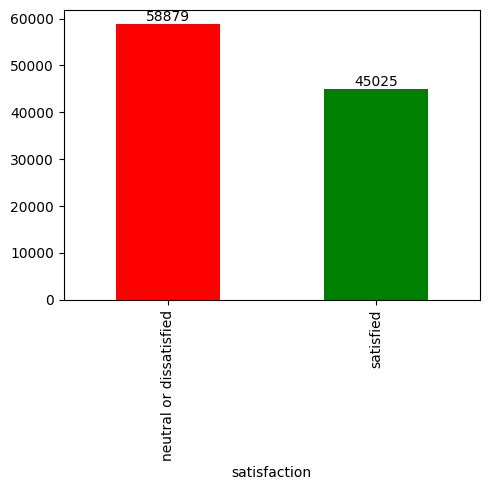

,proportion
satisfaction,
neutral or dissatisfied,0.566667
satisfied,0.433333


In [3]:
# Plotting satisfaction's feature values proportion

plt.figure(figsize=[5,5])
ax = train.satisfaction.value_counts().plot.bar(color=['red', 'green'])
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()
pd.DataFrame(train.satisfaction.value_counts(normalize=True))

In [4]:
# Treating null values from 'Arrival Delay in Minutes' column

col_null = train.isnull().any()[train.isnull().any()==True].index
train = train.fillna(value={col_null.values[0]:0})
test = test.fillna(value={col_null.values[0]:0})
print(f'Number of columns with null values: {train.isnull().any().sum()}')

Number of columns with null values: 0


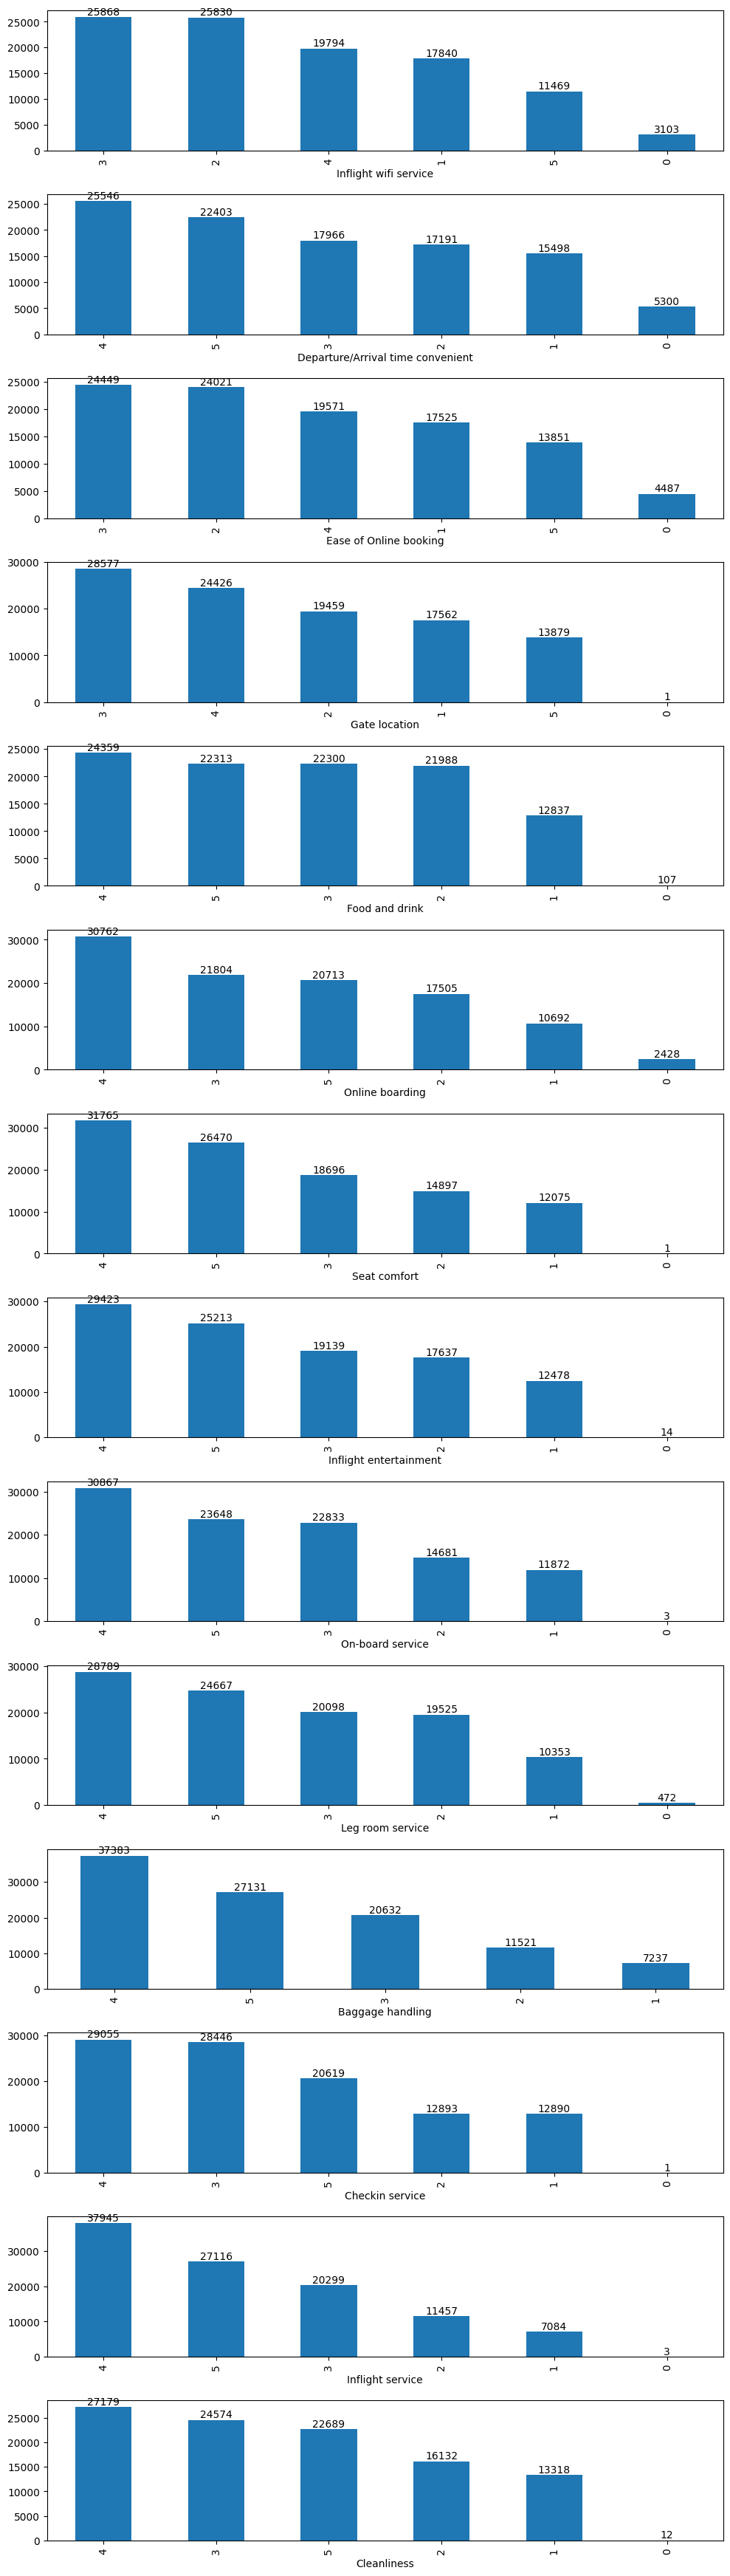

In [5]:
# Plotting services satisfaction levels distributions

plt.figure(figsize=[10,35])
for i,col in enumerate(train.columns[6:-3]):
    plt.subplot(14,1,i+1)
    ax = train[col].value_counts().plot.bar()
    ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

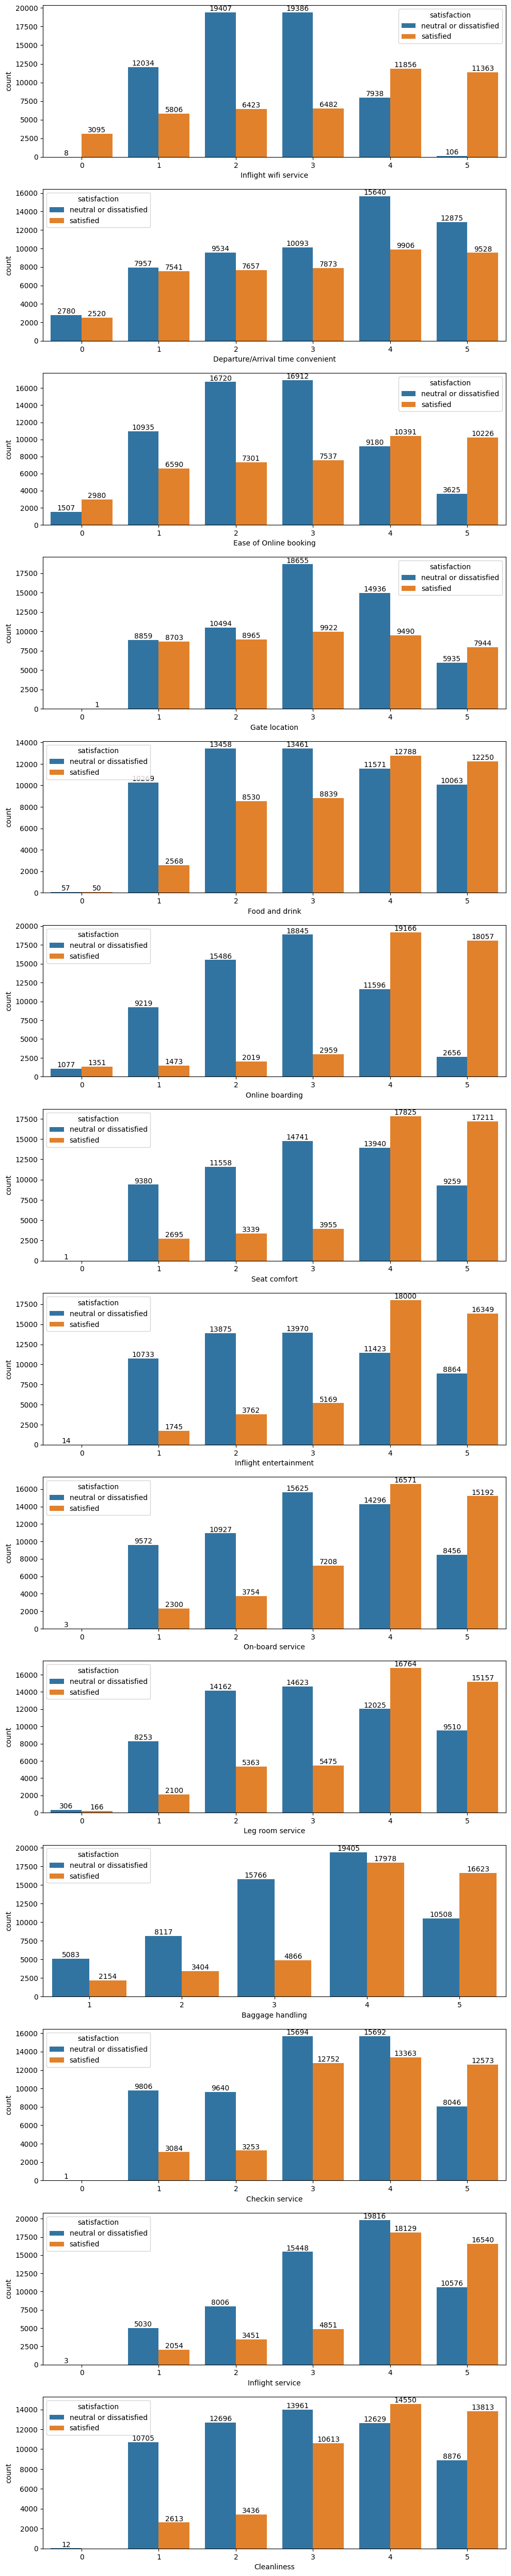

In [6]:
# Plotting services satisfaction levels anwsers (satisfied,neutral/dissatisfied) distribution

plt.figure(figsize=[10,50])
for i,col in enumerate(train.columns[6:-3]):
    plt.subplot(14,1,i+1)
    ax = sns.barplot(train[[col,'satisfaction']].value_counts().to_frame(),x=col,y='count',hue='satisfaction',hue_order = ['neutral or dissatisfied','satisfied'])
    for j in range(len(ax.containers)): ax.bar_label(ax.containers[j])
plt.tight_layout()
plt.show()

In [10]:
# Function that prints the proportion of surveys with at least 1 or 3 N/As in the train/test datasets

def na_proportion(df,type=['train','test']):
    zeros = df.drop(df.index)
    for col in df.iloc[:,6:-3]:
        zeros = pd.concat([zeros,df.loc[df[col]==0]])
    zeros = zeros.drop_duplicates().reset_index()

    print(f"Proportion of surveys with at least 1 N/A ({type} data): {round((zeros.shape[0]/df.shape[0])*100,2)}%")

    num_zeros = np.zeros(zeros.shape[0])
    for i in zeros.index:
        for j in range(6,20):
            if zeros.iloc[i,j] == 0 : num_zeros[i] += 1

    print(f"Proportion of surveys with at least 3 N/A's ({type} data): {round((num_zeros[num_zeros >= 3].shape[0]/df.shape[0])*100,2)}%")

na_proportion(train,'train')
print('\n')
na_proportion(test,'test')

Proportion of surveys with at least 1 N/A (train data): 7.89%
Proportion of surveys with at least 3 N/A's (train data): 2.51%


Proportion of surveys with at least 1 N/A (test data): 8.13%
Proportion of surveys with at least 3 N/A's (test data): 2.69%


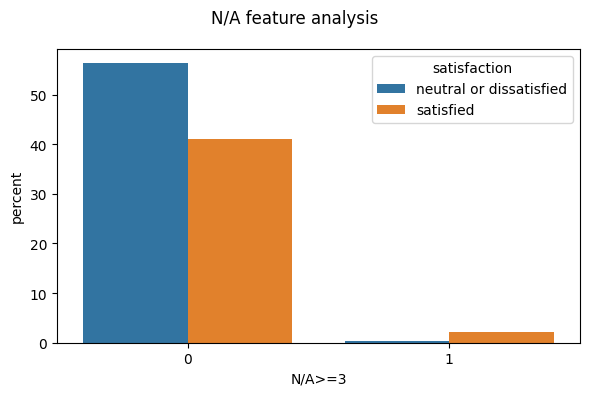

                         N/As < 3  N/As >= 3
satisfaction                                
neutral or dissatisfied  0.578267   0.116475
satisfied                0.421733   0.883525


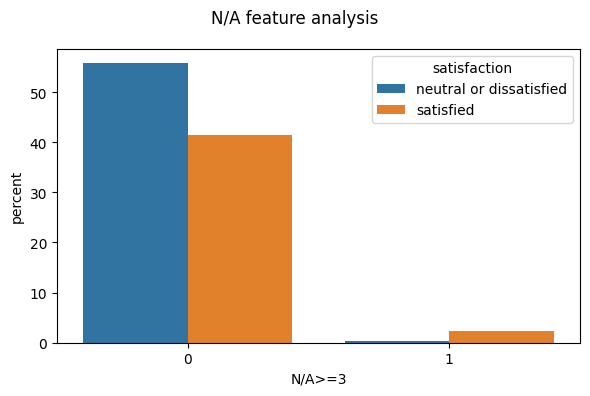

                         N/As < 3  N/As >= 3
satisfaction                                
neutral or dissatisfied  0.573367   0.114449
satisfied                0.426633   0.885551


In [11]:
# Adding 'N/A' column with the quantity of 'not applicable' anwsers (i.e. anwsers equals to 0) in the features based in satisfaction level

def na_column(data):

    df = data.copy()
    zeros = df.drop(df.index)
    for col in df.iloc[:,6:-3]:
        zeros = pd.concat([zeros,df.loc[df[col]==0]])
    zeros = zeros.drop_duplicates()
    zeros_ind = zeros.index; zeros = zeros.reset_index()

    num_zeros = np.zeros(zeros.shape[0])
    for i in zeros.index:
        for j in range(6,20):
            if zeros.iloc[i,j] == 0 : num_zeros[i] += 1

    for i in range(len(num_zeros)):
        if num_zeros[i] >= 3 : num_zeros[i] = 1
        else : num_zeros[i] = 0

    df['N/A>=3'] = np.zeros(df.shape[0]).astype(int)
    df.iloc[zeros_ind,-1] = num_zeros.astype(int)

    plt.figure(figsize=(6, 4))
    plt.suptitle('N/A feature analysis')
    sns.countplot(data=df, x='N/A>=3', hue='satisfaction', hue_order = ['neutral or dissatisfied','satisfied'], stat='percent')
    plt.tight_layout()
    plt.show()

    print(pd.concat([pd.Series(df.loc[df['N/A>=3']==0].satisfaction.value_counts(normalize=True),name='N/As < 3'),\
            pd.Series(df.loc[df['N/A>=3']==1].satisfaction.value_counts(normalize=True),name='N/As >= 3')],axis = 1))
    
    return pd.concat([data,df['N/A>=3']],axis=1)


train = na_column(train)
test = na_column(test)

In [12]:
# Removing outliers

def remove_outliers(df,type=['train','test']):
    fli_ind = set(df.loc[df['Flight Distance'] >= 4000].index)
    dep_ind = set(df.loc[df['Departure Delay in Minutes'] >= 400].index)
    arr_ind = set(df.loc[df['Arrival Delay in Minutes'] >= 400].index)
    outliers = fli_ind.union(dep_ind,arr_ind)
    print(f"Outliers ({type} data)  = {len(outliers)} =~ {round(len(outliers)/len(train),4)}%")
    return df.drop([i for i in outliers])

train = remove_outliers(train,'train')
test = remove_outliers(test,'test')

Outliers (train data)  = 163 =~ 0.0016%
Outliers (test data)  = 47 =~ 0.0005%


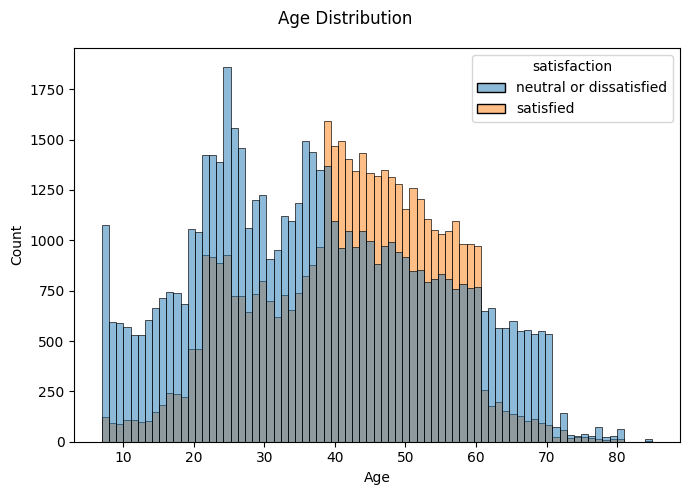

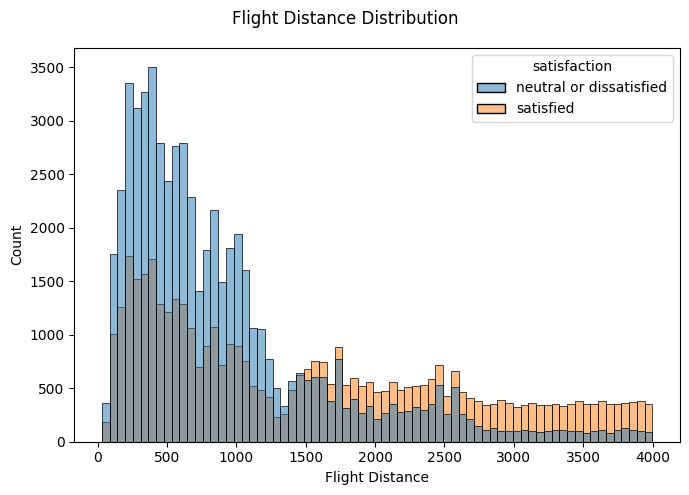

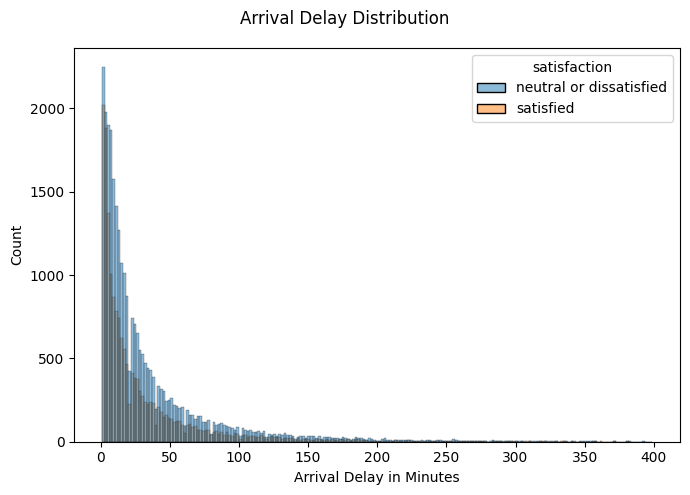

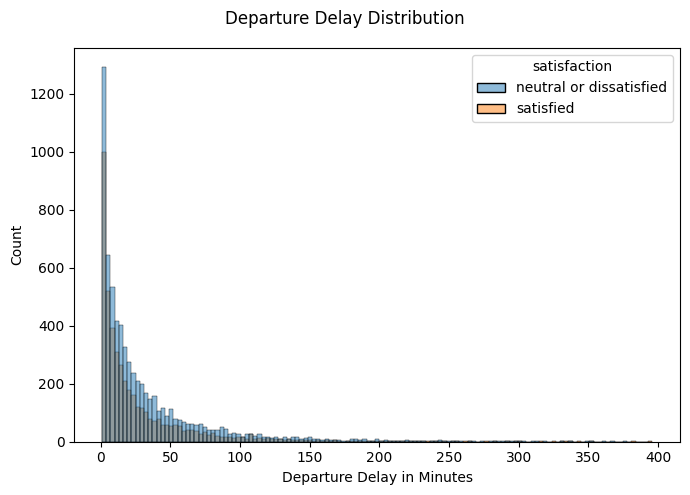

In [13]:
# Plotting numeric features (by default) distributions

plt.figure(figsize=(7, 5))
plt.suptitle('Age Distribution')
sns.histplot(data=train, x='Age', hue='satisfaction')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
plt.suptitle('Flight Distance Distribution')
sns.histplot(data=train, x='Flight Distance', hue='satisfaction')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
plt.suptitle('Arrival Delay Distribution')
sns.histplot(data=train.loc[train['Arrival Delay in Minutes'] > 0], x='Arrival Delay in Minutes', hue='satisfaction')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
plt.suptitle('Departure Delay Distribution')
sns.histplot(data=test.loc[test['Departure Delay in Minutes'] > 0], x='Departure Delay in Minutes', hue='satisfaction', hue_order=['neutral or dissatisfied','satisfied'])
plt.tight_layout()
plt.show()

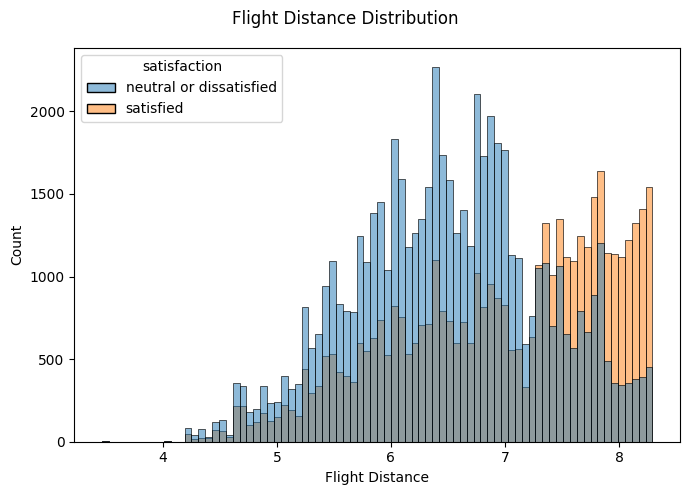

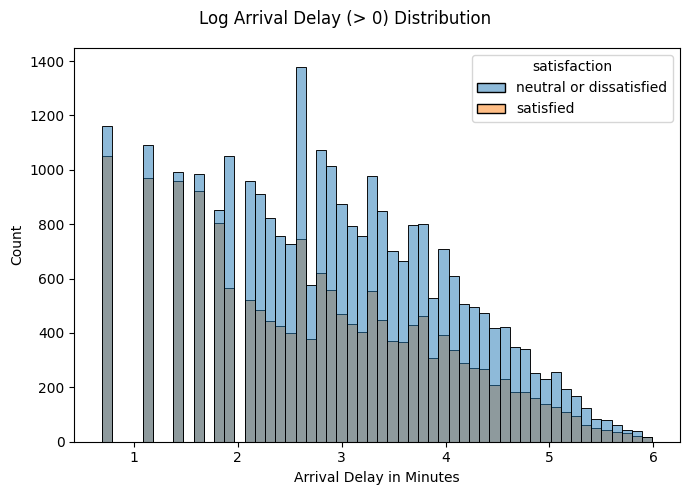

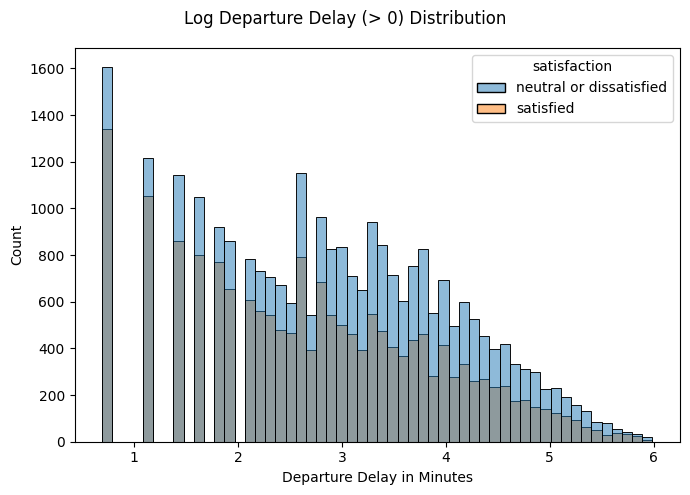

In [14]:
# Log tranformation in 'Delay's and 'Flight Distance' Features
log_delay = train.copy()
for col in ['Arrival Delay in Minutes','Departure Delay in Minutes','Flight Distance'] : log_delay[col] = log_delay[col].apply(np.log1p)

plt.figure(figsize=(7, 5))
plt.suptitle('Flight Distance Distribution')
sns.histplot(data=log_delay, x='Flight Distance', hue='satisfaction')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
plt.suptitle('Log Arrival Delay (> 0) Distribution')
sns.histplot(data=log_delay.loc[log_delay['Arrival Delay in Minutes'] > 0], x='Arrival Delay in Minutes', hue='satisfaction')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
plt.suptitle('Log Departure Delay (> 0) Distribution')
sns.histplot(data=log_delay.loc[log_delay['Departure Delay in Minutes'] > 0], x='Departure Delay in Minutes', hue='satisfaction')
plt.tight_layout()
plt.show()

In [15]:
# OBS.: People who probably didn't awnser the survey - For study purposes, it will saty in the data - NOT USED IN THE ANALYSIS

print(f"Porportion of people under 12 years old (trainig data): {round(train.loc[train.Age < 12,'Age'].shape[0]/train.shape[0],4)*100}%")
print('\n')
print(f"Porportion of people under 12 years old (testing data): {round(test.loc[test.Age < 12,'Age'].shape[0]/test.shape[0],4)*100}%")

Porportion of people under 12 years old (trainig data): 3.1300000000000003%


Porportion of people under 12 years old (testing data): 2.87%


In [16]:
# One-Hot Encoding in object features

def one_hot_encoding(df):

    ohe_df = pd.DataFrame()
    obj_cols = df.dtypes[df.dtypes==object].index # Array with 'object' data type features
    ohe_cols = ['Female','Loyal Customer','Business travel','satisfied'] # Columns names obtained by values
    ohe_names = ['Gender Female','Customer Loyalty','Business Travel','Satisfaction'] # New columns names for one-hot encoded features
    class_dict = {'Business':'Class Business','Eco':'Class Eco','Eco Plus':'Class Eco Plus'} # Used only for 'Class' feature

    for i,col in enumerate(obj_cols):
        if col == 'Class': 
            ohe_df = pd.concat([ohe_df,pd.get_dummies(df[col],dtype=int).rename(class_dict,axis=1)],axis=1)
        elif col == 'satisfaction': 
            ohe_df = pd.concat([ohe_df,pd.get_dummies(df[col],dtype=int)[ohe_cols[i-1]].rename(ohe_names[i-1])],axis=1)
        else : 
            ohe_df = pd.concat([ohe_df,pd.get_dummies(df[col],dtype=int)[ohe_cols[i]].rename(ohe_names[i])],axis=1)

    df = df.drop(obj_cols,axis=1)
    df = pd.concat([df,ohe_df],axis=1)

    return df


train = one_hot_encoding(train)
test = one_hot_encoding(test)

In [17]:
# Scalling data with MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

def survey_cols_scaler(df):
    new_data = []
    mm_scaler = MinMaxScaler()
    mm_scaler.fit(np.array([0,1,2,3,4,5]).reshape(-1,1))
    for i in range(2,16): new_data.append(mm_scaler.transform(df.iloc[:,i].to_numpy().reshape(-1,1)))
    return new_data

def minmax_scaler(df,col,scaler=None):
    if scaler == None:
        mm_scaler = MinMaxScaler()
        new_data = mm_scaler.fit_transform(df[[col]])
        return [new_data,mm_scaler]
    else:
        new_data = scaler.transform(df[[col]])
        return new_data

# Age, Flight Distance, Departure Delay, Arrival Delay
for col in ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    new_train_data, mm_scaler = minmax_scaler(train,col)
    new_test_data = minmax_scaler(test,col,mm_scaler)
    train[col] = new_train_data
    test[col] = new_test_data

# 'Survey' columns
new_train_survey = survey_cols_scaler(train)
new_test_survey  = survey_cols_scaler(test)

for i in range(2,16):
    train.iloc[:,i] = new_train_survey[i-2]
    test.iloc[:,i] = new_test_survey[i-2]

train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Arrival Delay in Minutes,N/A>=3,Gender Female,Customer Loyalty,Business Travel,Class Business,Class Eco,Class Eco Plus,Satisfaction
0,0.076923,0.108115,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,...,0.062814,0.045113,0,0,1,0,0,0,1,0
1,0.230769,0.051411,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,0.002513,0.015038,0,0,0,1,1,0,0,0
2,0.243590,0.279990,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0,1,1,1,1,0,0,1
3,0.230769,0.133821,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,...,0.027638,0.022556,0,1,1,1,1,0,0,0
4,0.692308,0.046119,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.000000,0.000000,0,0,1,1,1,0,0,1


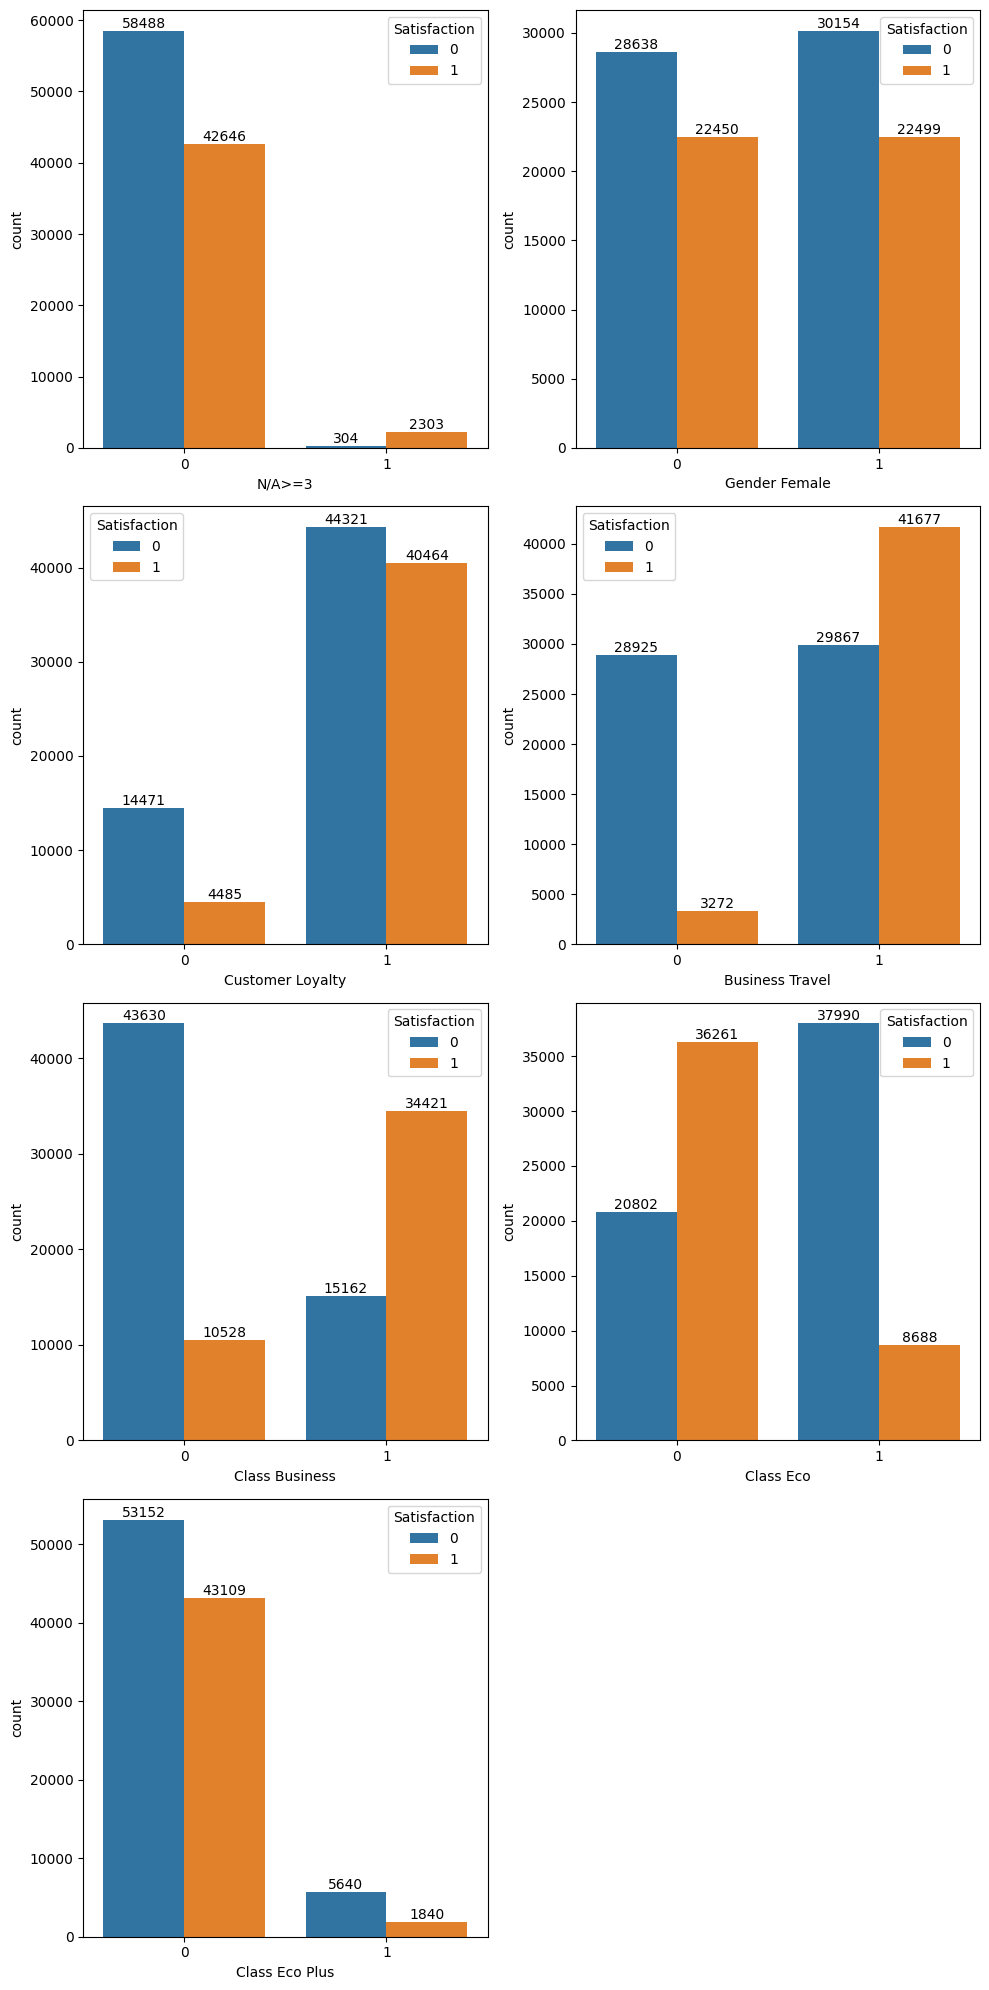

In [18]:
# Plotting binary columns anwsers (satisfied,neutral/dissatisfied) distributions

plt.figure(figsize=[10,20])
for i,col in enumerate(train.columns[18:-1]):
    plt.subplot(4,2,i+1)
    ax = sns.barplot(train[[col,'Satisfaction']].value_counts().to_frame(),x=col,y='count',hue='Satisfaction')
    for j in range(len(ax.containers)): ax.bar_label(ax.containers[j])
plt.tight_layout()
plt.show()

<Axes: >

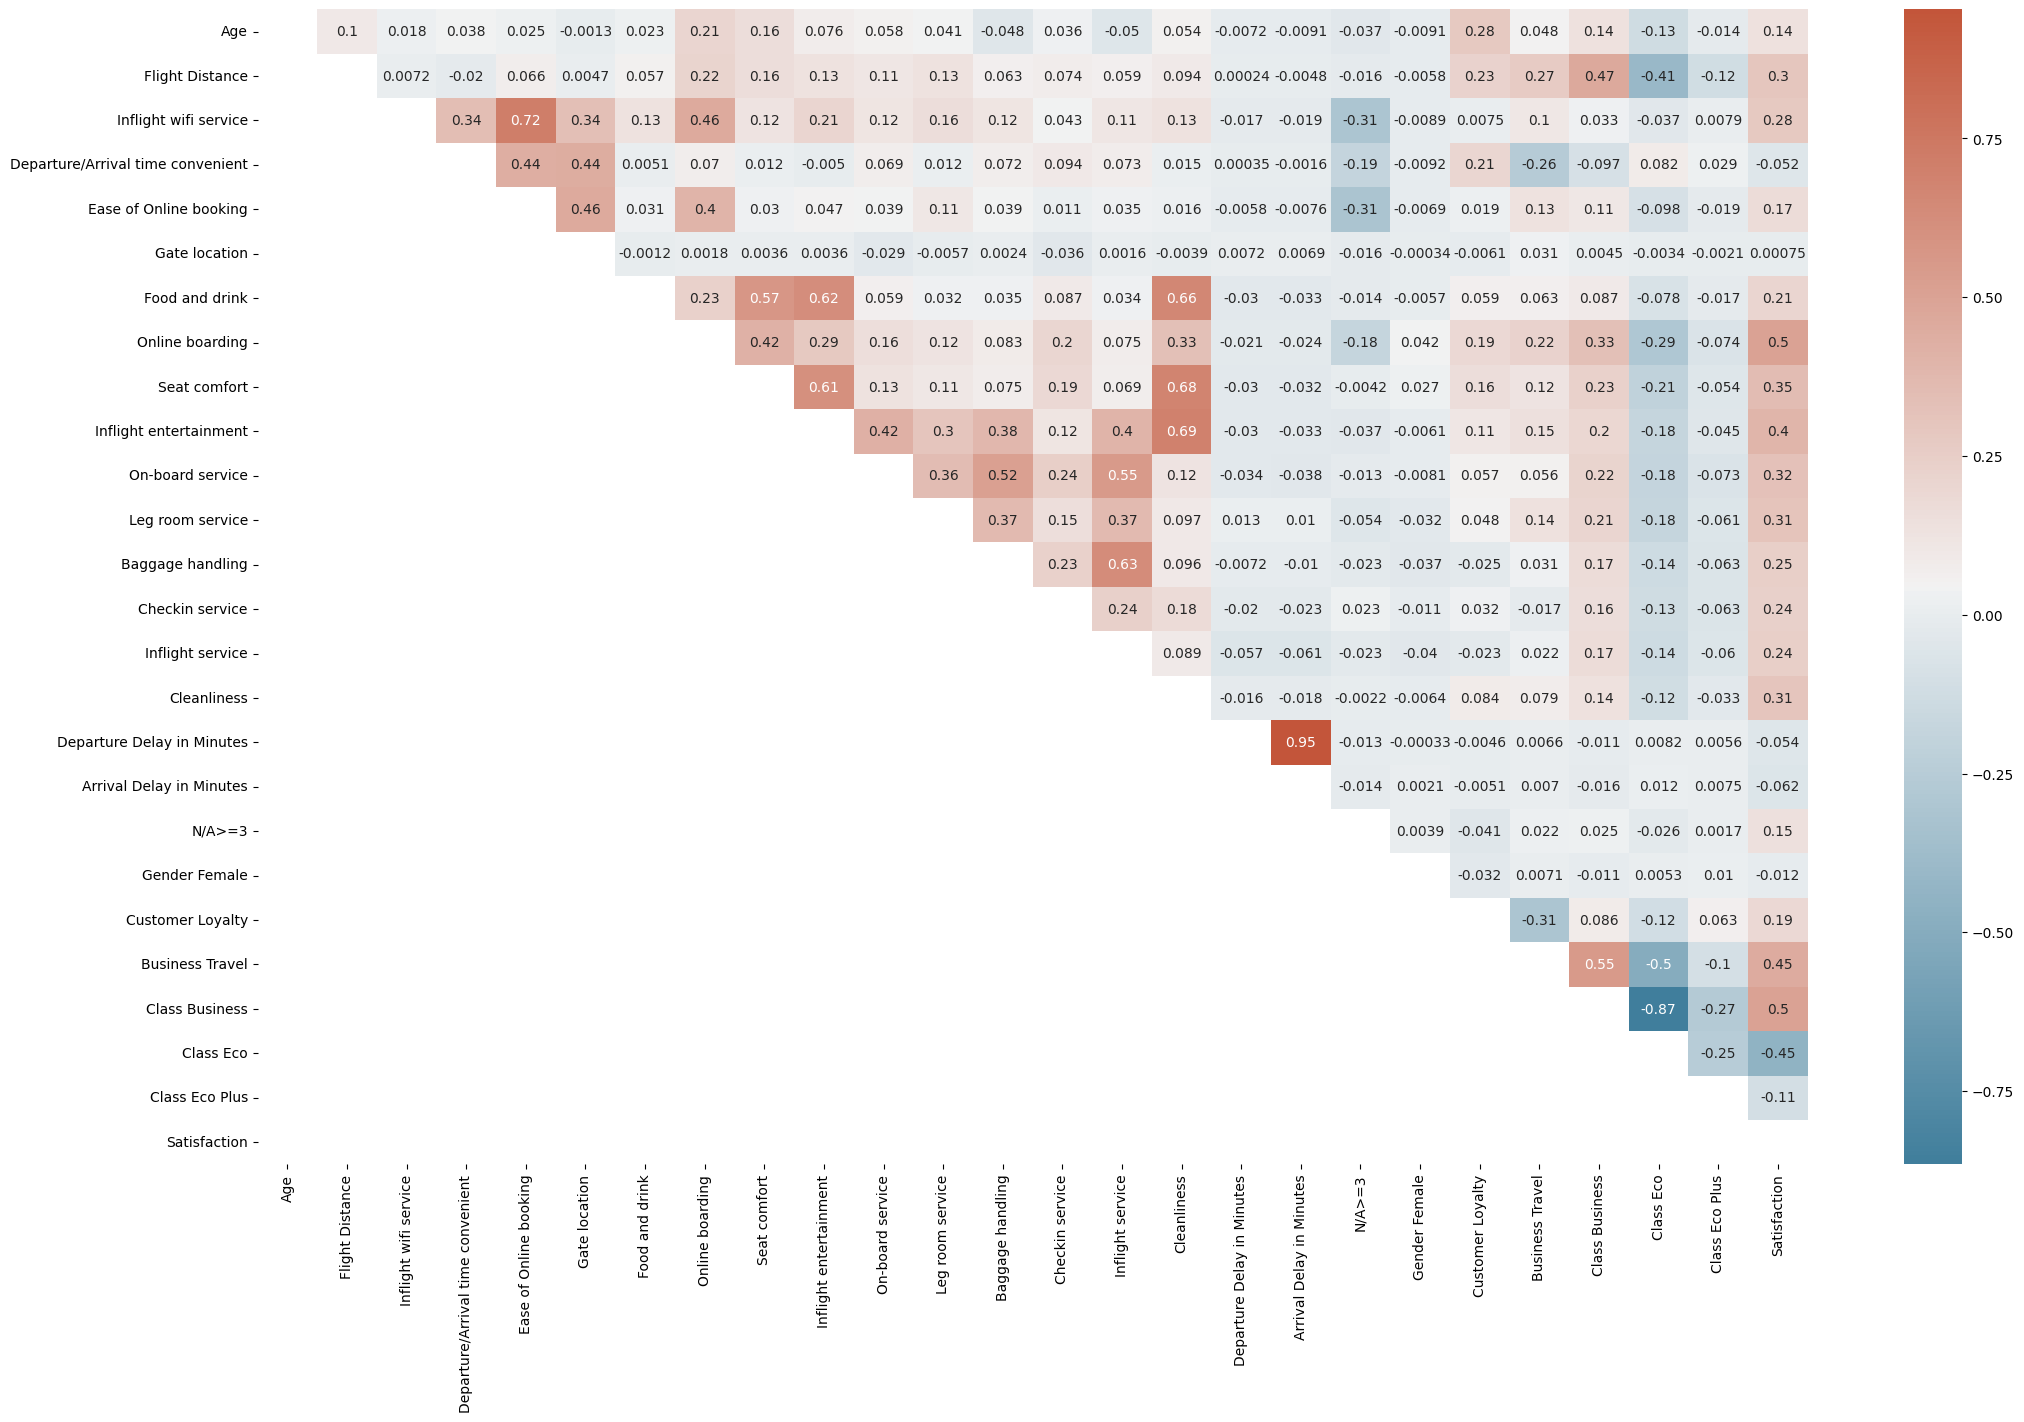

In [19]:
# Correlation between different variables - Using Pearson's Correlation Coefficient

corr = train.corr() # PCC is already set by default using .corr() function

f, ax = plt.subplots(figsize=(25, 15)) # Set up the matplotlib plot configuration

mask = np.tril(np.ones_like(corr, dtype=bool)) # Generate a mask for upper traingle

cmap = sns.diverging_palette(230, 20, as_cmap=True) # Configure a custom diverging colormap

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap) # Draw the heatmap

In [17]:
# Function to evaluate the machine learning models with metrics derived from confusion matrix

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score

def evaluate_metrics(yt, yp, prob=None):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    if prob is not None : results_pos['roc_auc'] = roc_auc_score(yt, prob, average=None)
    return results_pos

In [18]:
# Defining the working sets

from sklearn.model_selection import StratifiedKFold

y_train = train.pop('Satisfaction')
y_test = test.pop('Satisfaction')
kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=321)

In [18]:
# Logistic Regression - Hyperpameters search 1

#from sklearn.linear_model import LogisticRegressionCV
#from sklearn.model_selection import StratifiedKFold, GridSearchCV

#y_train = train.pop('Satisfaction')
#kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=321)

#logreg = LogisticRegressionCV()

#params_liblin = {
#    'solver' : ['liblinear'],
#    'max_iter' : [1000],
#    'penalty' : ['l1'],
#    'Cs' : [0.1,1,10,100],
#    'cv' : [kfold]
#}

#grid = GridSearchCV(logreg,params_liblin,verbose=1)
#grid.fit(train,y_train)
#print(f'BEST SCORE = {grid.best_score_}')
#print('\n')
#print(f'BEST PARAMS = {grid.best_params_}')
# REGULARIZATION TEST:
# ['l1','l2'] : l1 = # {'accuracy': 0.8890045894558216, 'recall': 0.8700351493848858, 'precision': 0.8761946902654867, 'f1score': 0.8731040564373898}

In [19]:
# Logistic Regression - Hyperpameters search 2

#params_saga = {
#    'solver' : ['saga'],
#    'max_iter' : [1000],
#    'penalty' : ['l2'],
#    'Cs' : [1,10,100], # 10
#    'cv' : [kfold]
#}

#grid2 = GridSearchCV(logreg,params_saga)
#grid2.fit(train,y_train)
#print(f'BEST SCORE - SAGA = {grid2.best_score_}')
#print('\n')
#print(f'BEST PARAMS - SAGA = {grid2.best_params_}')

# REGULARIZATION TEST:
# ['l1','l2','elasticnet'] : l2 = {'accuracy': 0.8890045894558216, 'recall': 0.8701230228471002, 'precision': 0.8761281189170058, 'f1score': 0.8731152455691737}

In [20]:
# Logistic Regression - Hyperpameters search 3

#from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

#logreg = LogisticRegression(solver='saga',max_iter=1000,penalty='l2',C=10,random_state=321)
#lgr_cv = LogisticRegressionCV(solver='saga',max_iter=1000,penalty='l2',cv=kfold,random_state=321)

#logreg.fit(train,y_train)
#lgr_cv.fit(train,y_train)

#y_lr = logreg.predict(test)
#y_cv = lgr_cv.predict(test)
#prob_lr = logreg.predict_proba(test)[:,1]
#prob_cv = lgr_cv.predict_proba(test)[:,1]

#print('DEFAULT - LOGISTIC REGRESSION:')
#print(evaluate_metrics(y_test,y_lr,prob_lr))
#print('\nCROSS VALIDATED - LOGISTIC REGRESSION:')
#print(evaluate_metrics(y_test,y_cv,prob_cv))

#DEFAULT - LOGISTIC REGRESSION:
#{'accuracy': 0.8889660226001774, 'recall': 0.8700351493848858, 'precision': 0.8761171577736484, 'f1score': 0.8730655614831797, 'roc_auc': 0.9529725739851791}
#
#CROSS VALIDATED - LOGISTIC REGRESSION:
#{'accuracy': 0.8890045894558216, 'recall': 0.8701230228471002, 'precision': 0.8761281189170058, 'f1score': 0.8731152455691737, 'roc_auc': 0.9529727551800286}

In [29]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegressionCV

logreg =  LogisticRegressionCV(solver='saga',max_iter=1000,penalty='l2',cv=kfold)

logreg.fit(train,y_train)
y_logreg = logreg.predict(test)
prob = logreg.predict_proba(test)[:,1]
logreg_score = evaluate_metrics(y_test,y_logreg,prob)
print(logreg_score) # Printing scores

{'accuracy': 0.8890045894558216, 'recall': 0.8701230228471002, 'precision': 0.8761281189170058, 'f1score': 0.8731152455691737, 'roc_auc': 0.9529730692511011}


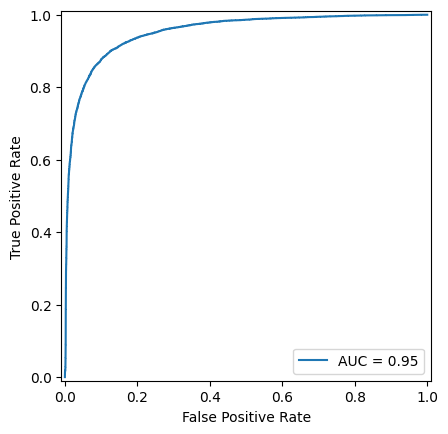

In [20]:
# Function that displays the roc-curve and prints the auc-roc score

from sklearn.metrics import RocCurveDisplay, roc_curve, auc

def roc_curve_graph(y_test,prob):
    fpr, tpr, thresholds = roc_curve(y_test,prob)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    display.plot()
    plt.show()

roc_curve_graph(y_test,prob)

N/A>=3                        8.324495
Online boarding               4.312514
Arrival Delay in Minutes      3.653260
Business Travel               3.099383
Inflight wifi service         2.943126
Customer Loyalty              2.454117
Checkin service               1.626073
On-board service              1.552121
Leg room service              1.534810
Departure Delay in Minutes    1.495056
Cleanliness                   1.115855
dtype: float64

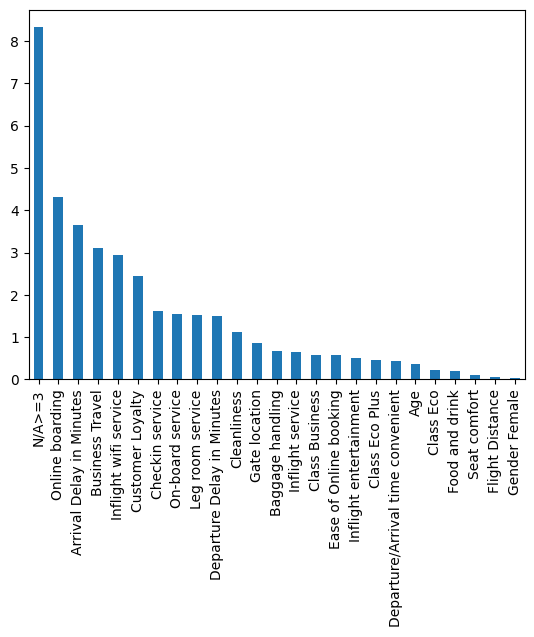

In [25]:
# Logistic Regression coefficients maginitudes

coefs_mag = pd.Series(np.abs(logreg.coef_[0]),index=logreg.feature_names_in_).sort_values(ascending=False)
coefs_mag.plot.bar()
coefs_mag[coefs_mag >= 1]

N/A>=3                   8.324502
Online boarding          4.312454
Business Travel          3.099336
Inflight wifi service    2.943145
Customer Loyalty         2.454021
dtype: float64


Age                                 -0.369456
Departure/Arrival time convenient   -0.437048
Class Eco Plus                      -0.453781
Gate location                       -0.867546
Arrival Delay in Minutes            -3.653444
dtype: float64




<Axes: >

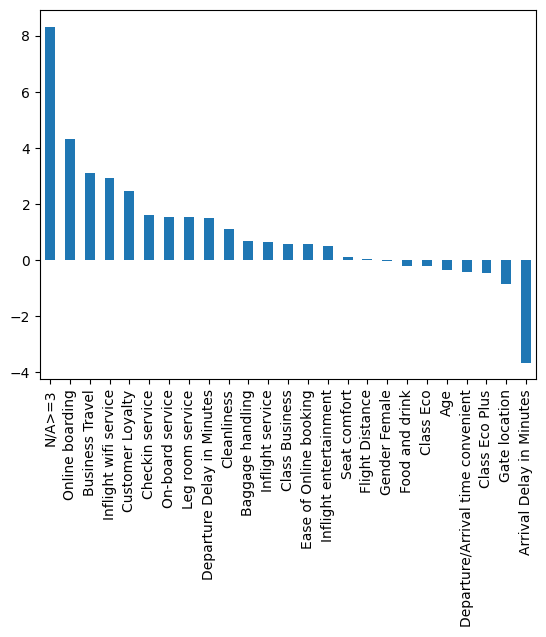

In [21]:
# Comparing logistic regression coeficients

coefs = pd.Series(logreg.coef_[0],index=logreg.feature_names_in_).sort_values(ascending=False)
print(coefs.head())
print('\n')
print(coefs.tail())
print('\n')
coefs.plot.bar()

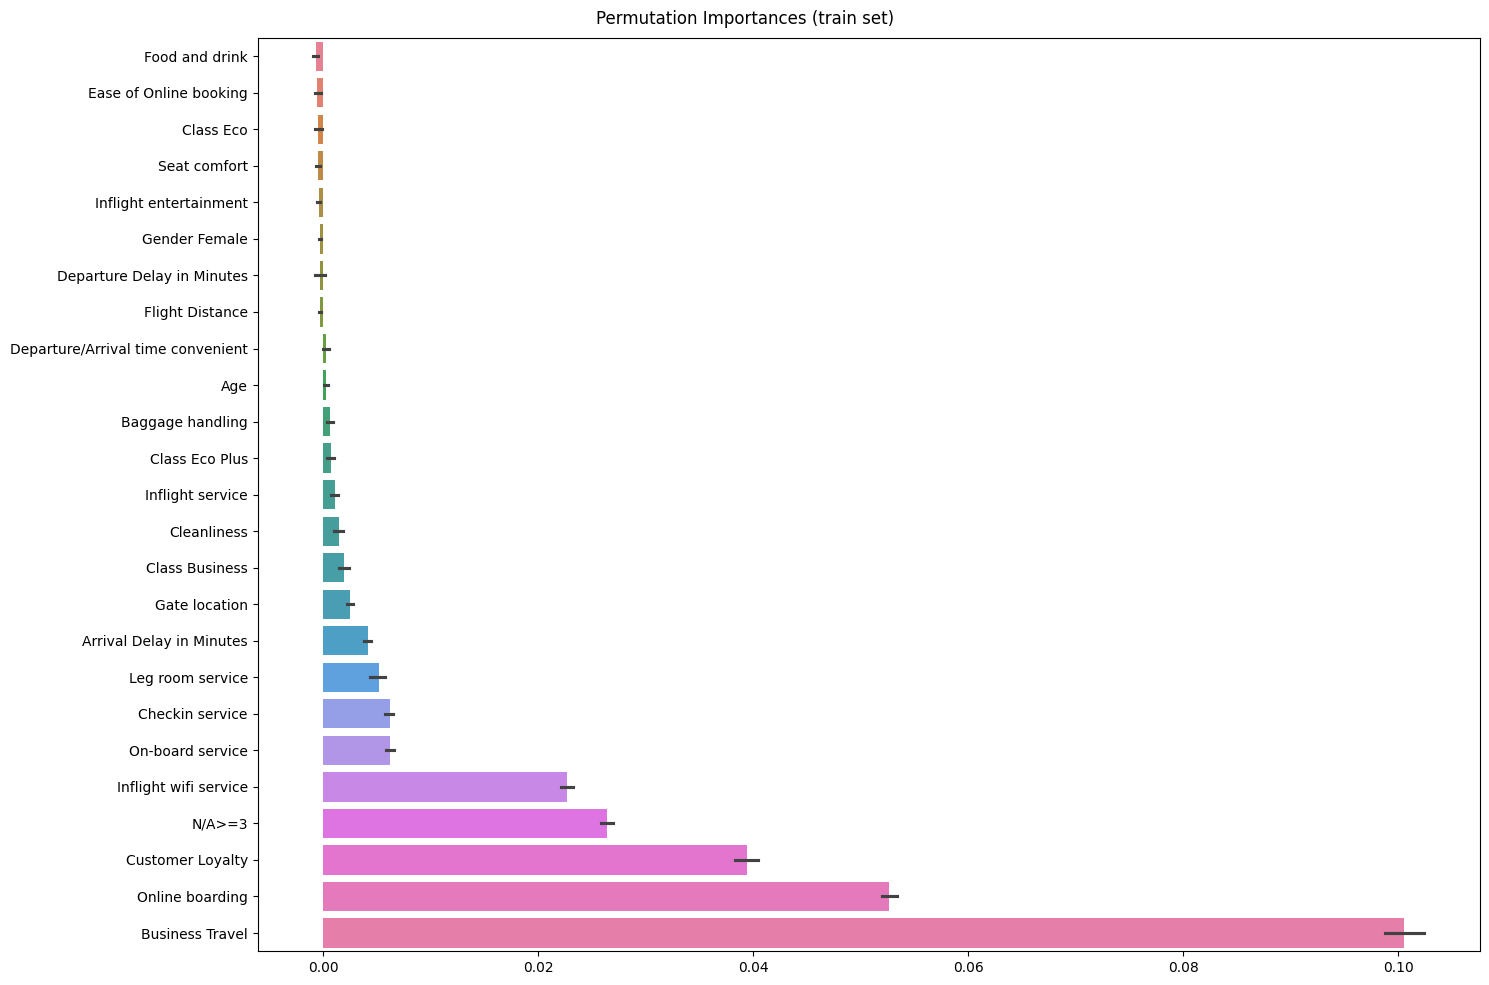

                         Values
Business Travel        0.100590
Online boarding        0.052621
Customer Loyalty       0.039462
N/A>=3                 0.026434
Inflight wifi service  0.022677


In [27]:
# Function to visualize the features importances using permutation through 5 repetitions

from sklearn.inspection import permutation_importance

def visualize_feature_importance(importance_array):
    # Sort the array based on mean value
    sorted_idx = importance_array.importances_mean.argsort()
    # Visualize the feature importances using boxplot
    plt.figure(figsize=(15, 10))
    plt.suptitle("Permutation Importances (train set)")
    sns.barplot(pd.DataFrame(importance_array.importances[sorted_idx],index=train.columns[sorted_idx]).T,orient='h')
    plt.tight_layout()
    plt.show()
    print(pd.DataFrame(importance_array.importances_mean,index=train.columns,columns=['Values']).sort_values(ascending=False,by='Values').head())

# Logistic Regression's feature importances
feature_importances_logreg = permutation_importance(estimator=logreg, X = test, y = y_test, n_repeats=5, random_state=321)

visualize_feature_importance(feature_importances_logreg)

In [ ]:
# K Nearest Neighbors (KNN) - hyperparameter search

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

k_values = [2*i+1 for i in range(20)]

for w in ['uniform','distance']:

    f1_scores = list()
    error_rates = list() # 1-accuracy

    for k in k_values:
        
        knn = KNeighborsClassifier(n_neighbors=k, weights=w)
        knn = knn.fit(train, y_train)
        
        y_pred = knn.predict(test)
        f1 = f1_score(y_pred, y_test)
        f1_scores.append((round(f1_score(y_test, y_pred), 4)))
        error = 1-round(accuracy_score(y_test, y_pred), 4)
        error_rates.append((error))
        if k == len(k_values)*2-1 : 
            if w == 'uniform': uni_df = pd.DataFrame({'F1-Score_'+w : f1_scores,'Error-Rate_'+w : error_rates},index=k_values)
            else: wei_df = pd.DataFrame({'F1-Score_'+w : f1_scores,'Error-Rate_'+w : error_rates},index=k_values)

f1_results = pd.concat([uni_df.iloc[:,0],wei_df.iloc[:,0]],axis=1)
error_results = pd.concat([uni_df.iloc[:,1],wei_df.iloc[:,1]],axis=1)

    F1-Score_uniform  F1-Score_distance
7             0.9256             0.9260
5             0.9251             0.9251
13            0.9248             0.9253
9             0.9247             0.9248
11            0.9246             0.9250


    Error-Rate_uniform  Error-Rate_distance
7               0.0636               0.0633
5               0.0641               0.0641
13              0.0642               0.0638
9               0.0643               0.0642
11              0.0644               0.0641


<Figure size 800x600 with 0 Axes>

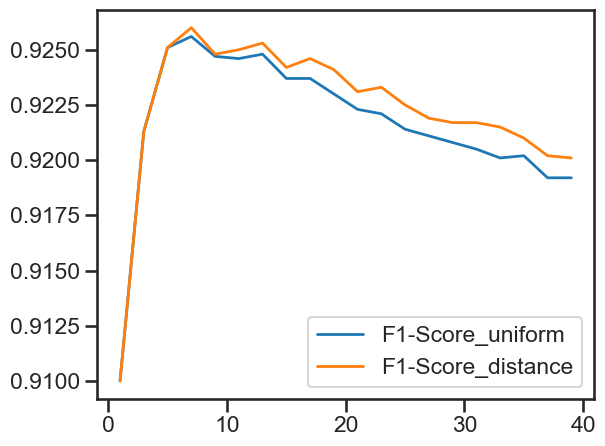

<Figure size 800x600 with 0 Axes>

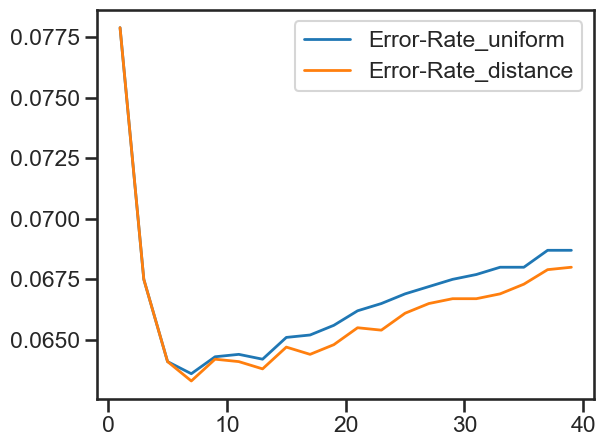

In [21]:
# Plotting and pronting results

print(f1_results.sort_values(by='F1-Score_uniform',ascending=False).head())
print('\n')
print(error_results.sort_values(by='Error-Rate_uniform',ascending=True).head())

# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(figsize=(8, 6))
ax = f1_results.plot(linewidth=2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
ax = error_results.plot(linewidth=2)
plt.tight_layout()
plt.show()

{'accuracy': 0.9367117898877705, 'recall': 0.9023725834797891, 'precision': 0.9509213816094083, 'f1score': 0.9260110915731097, 'roc_auc': 0.9782460966703516}


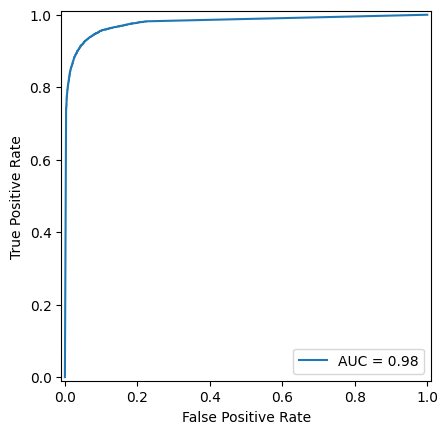

In [27]:
# K Nearest Neighbors (KNN) model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(train, y_train)
y_knn = knn.predict(test)
prob_knn = knn.predict_proba(test)[:,1]
knn_score = evaluate_metrics(y_test,y_knn,prob_knn)
print(knn_score) # Printing scores
roc_curve_graph(y_test,prob_knn) # Plotting roc-curve

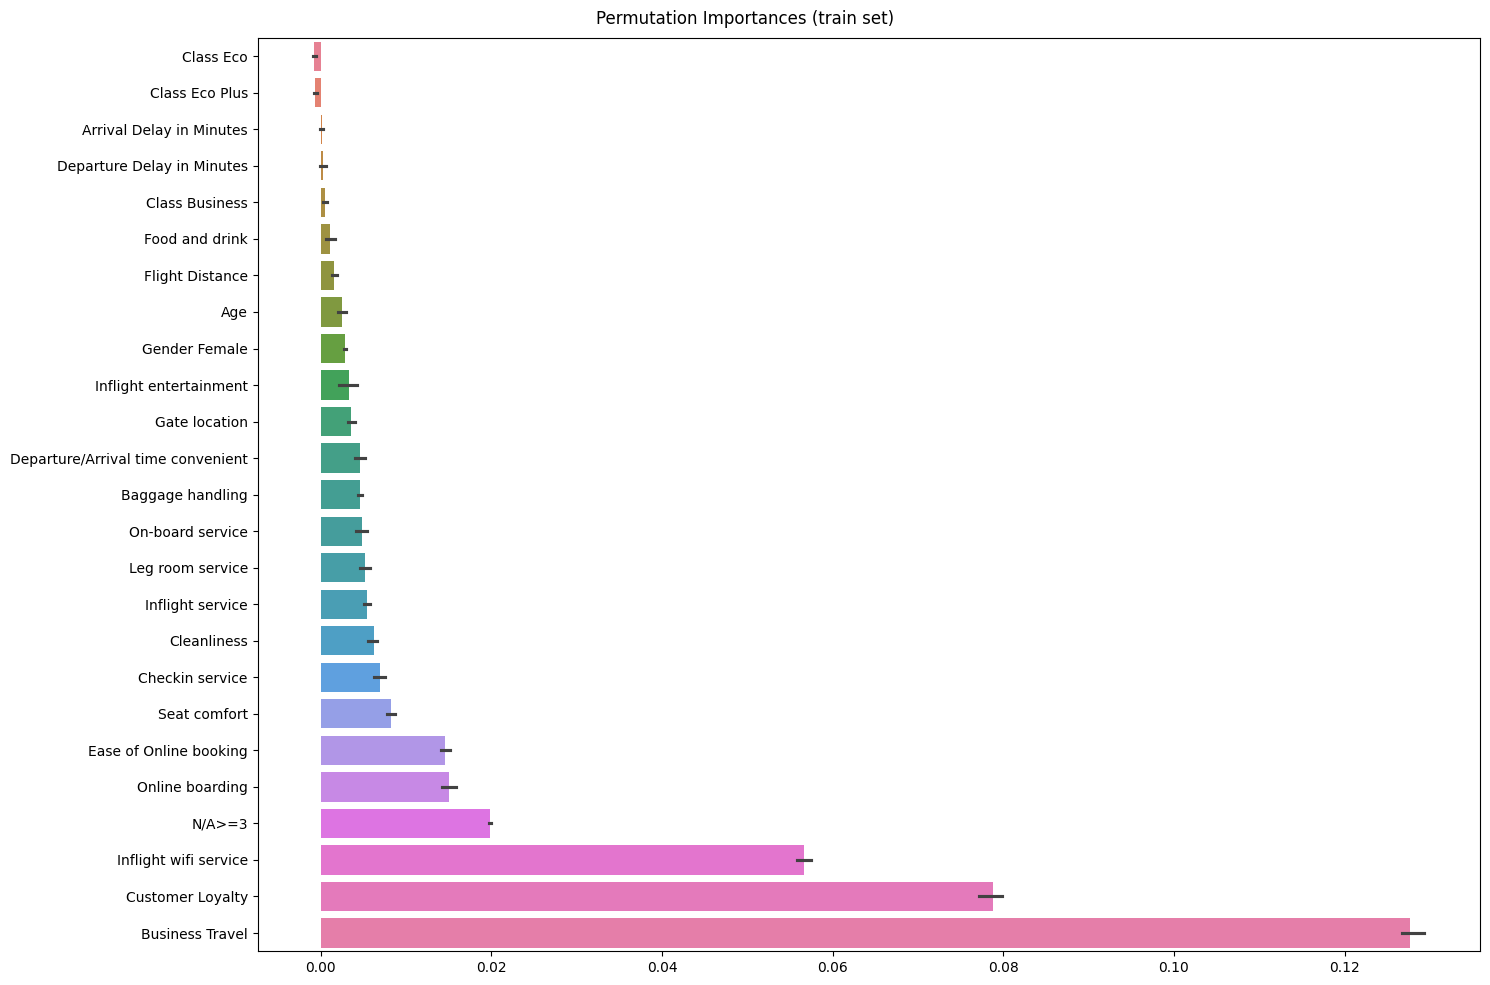

                         Values
Business Travel        0.127726
Customer Loyalty       0.078800
Inflight wifi service  0.056585
N/A>=3                 0.019793
Online boarding        0.015072


In [43]:
# KNN's feature importance visualization

feature_importances_knn = permutation_importance(estimator=knn, X = test, y = y_test, n_repeats=5, random_state=321)

visualize_feature_importance(feature_importances_knn)

In [ ]:
# Decision Tree - Hyperparmeter search 1

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import GridSearchCV

#dt = DecisionTreeClassifier()

#params = {
#    'criterion': ['entropy','gini'],
#    'max_features': ['sqrt','log2'],
#    'random_state':[321]
#}

#grid = GridSearchCV(dt, params, cv=kfold)
#grid.fit(train, y_train)
#print(f'BEST SCORE - RANDOM FOREST = {grid.best_score_}')
#print('\n')
#print(f'BEST PARAMS - RANDOM FOREST:\n{grid.best_params_}')
#BEST SCORE - RANDOM FOREST = 0.9371223183073532
#BEST PARAMS - RANDOM FOREST: {'criterion': 'entropy', 'max_features': 'sqrt', 'random_state': 321}


In [31]:
# Decision Tree - Hyperparmeter search 2

#dt_entr = DecisionTreeClassifier(criterion='entropy',random_state=321)
#dt_gini = DecisionTreeClassifier(random_state=321)

#dt_entr.fit(train,y_train)
#dt_gini.fit(train,y_train)

#y_entr = dt_entr.predict(test)
#y_gini = dt_gini.predict(test)
#prob_entr = dt_entr.predict_proba(test)[:,1]
#prob_gini = dt_gini.predict_proba(test)[:,1]

#print('ENTROPY - DECISION TREE:')
#print(evaluate_metrics(y_test,y_entr,prob_entr))
#print('\nGINI - DECISION TREE:')
#print(evaluate_metrics(y_test,y_gini,prob_gini))

#ENTROPY - DECISION TREE:
#{'accuracy': 0.9500559219406842, 'recall': 0.9436731107205624, 'precision': 0.942596331080488, 'f1score': 0.9431344135599175, 'roc_auc': 0.9493607838295918}
#
#GINI - DECISION TREE:
#{'accuracy': 0.9467006054996336, 'recall': 0.9409490333919156, 'precision': 0.9378174811700823, 'f1score': 0.9393806474252128, 'roc_auc': 0.9460742142696742}

{'accuracy': 0.9500559219406842, 'recall': 0.9436731107205624, 'precision': 0.942596331080488, 'f1score': 0.9431344135599175, 'roc_auc': 0.9493607838295918}


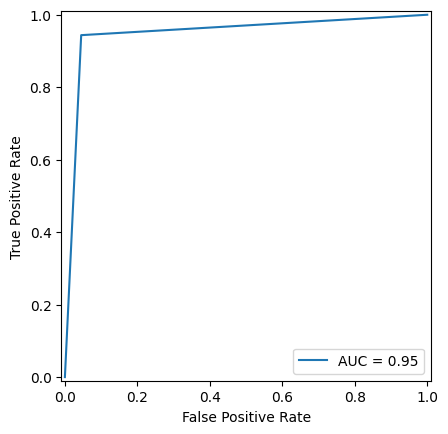

In [25]:
# Decision Tree model

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',random_state=321)
dt.fit(train,y_train)
y_dt = dt.predict(test)
prob_dt = dt.predict_proba(test)[:,1]
dt_score = evaluate_metrics(y_test,y_dt,prob_dt)
print(dt_score) # Printing scores
roc_curve_graph(y_test,prob_dt) # Plotting roc-curve

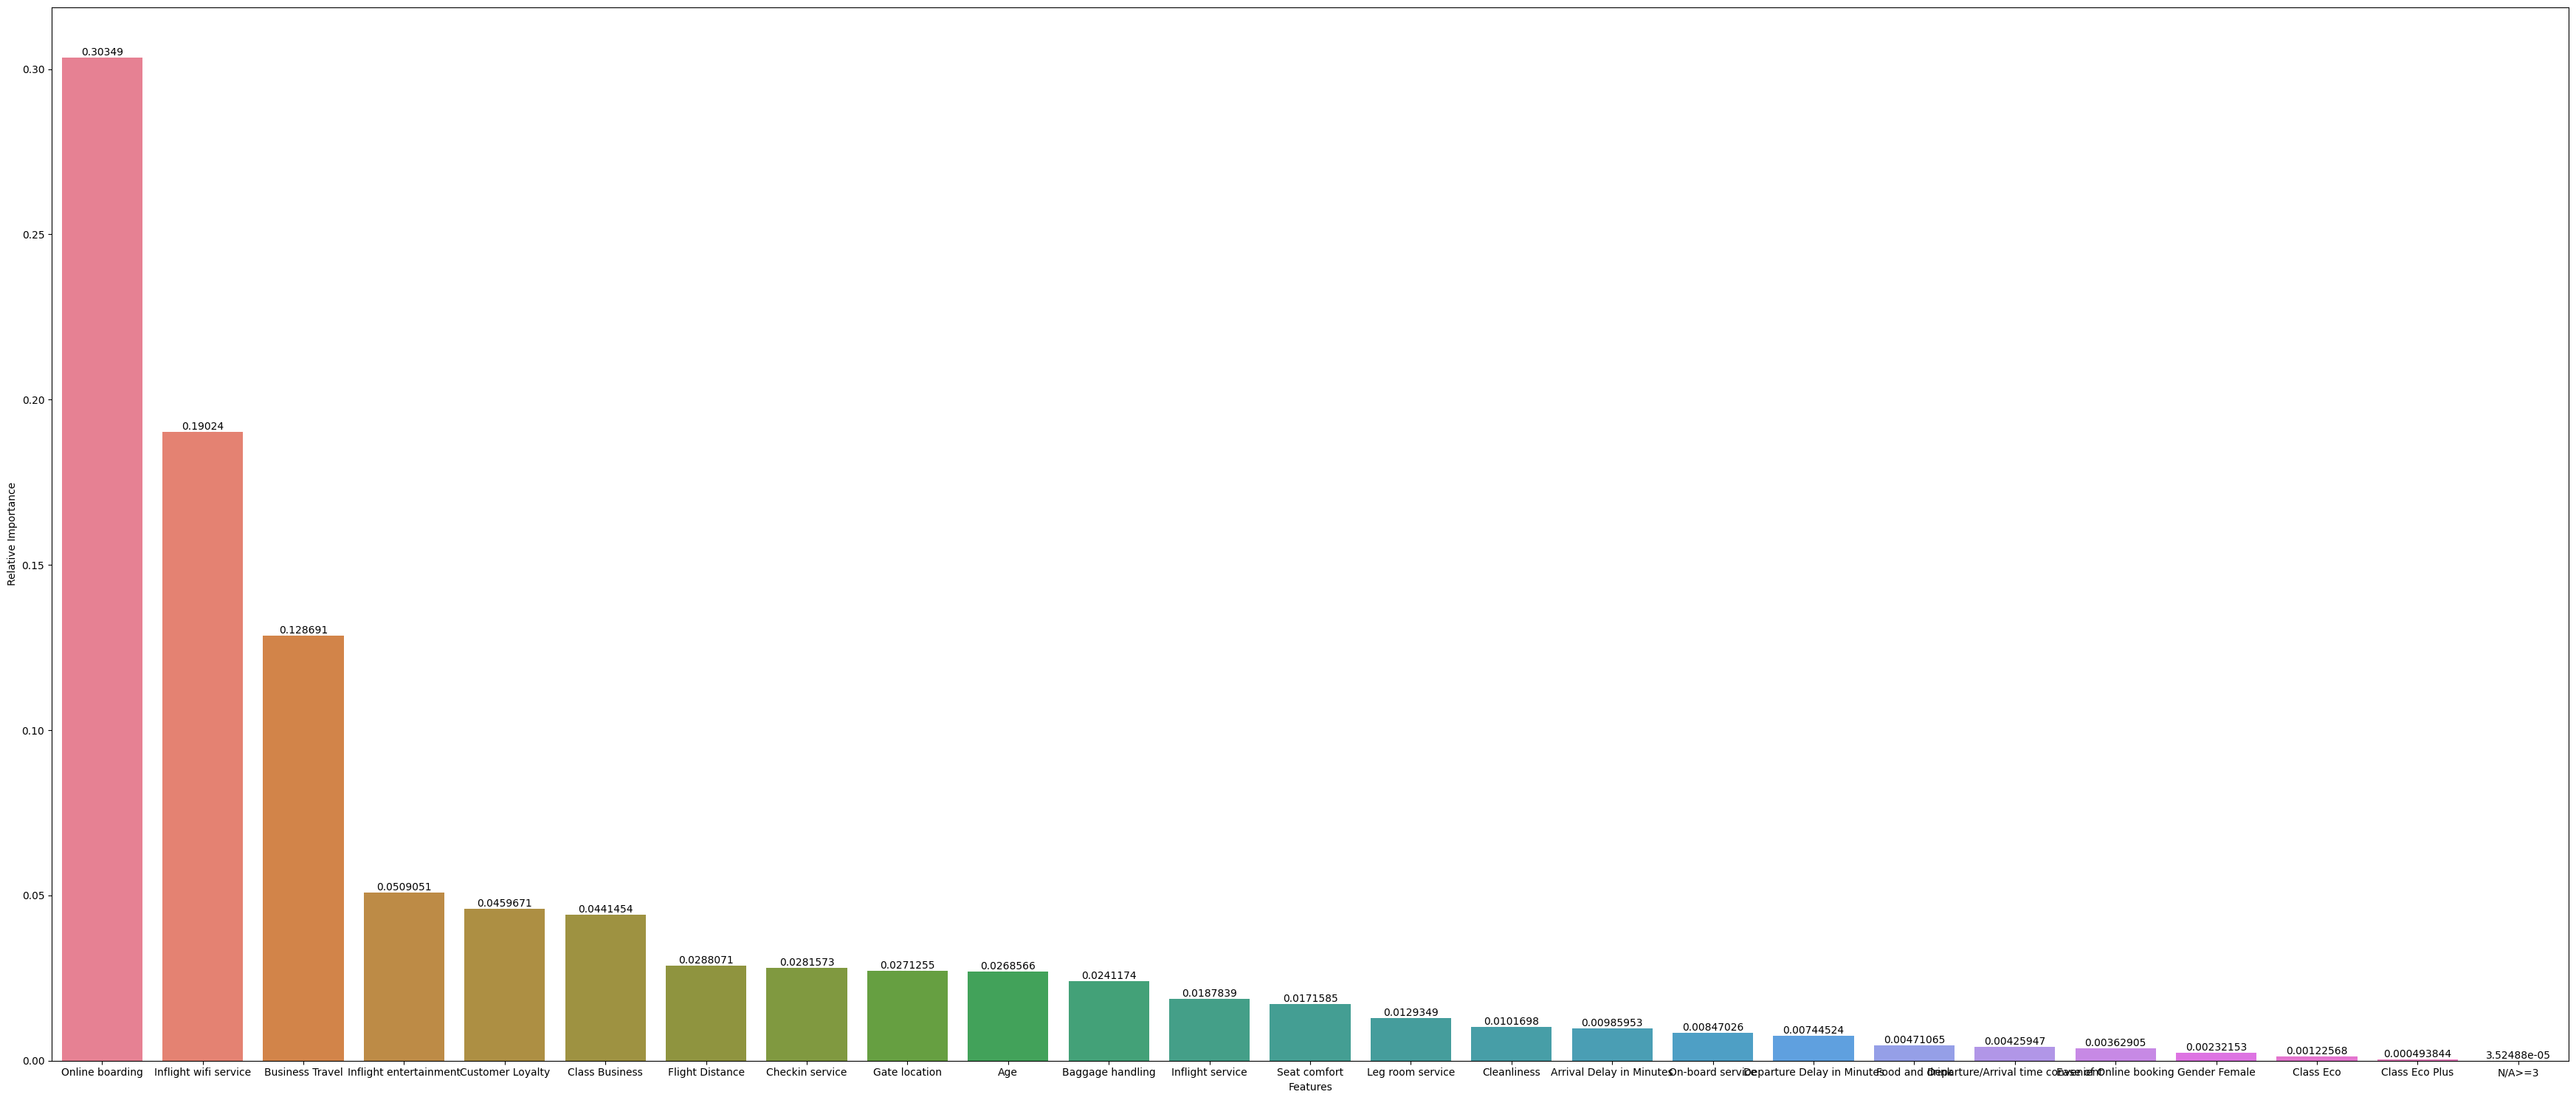

,Features,Relative Importance
7,Online boarding,0.30349
2,Inflight wifi service,0.19024
21,Business Travel,0.128691
9,Inflight entertainment,0.050905
20,Customer Loyalty,0.045967


In [32]:
# Impurity-based feature importances

feature_imp = pd.DataFrame([train.columns.values,dt.feature_importances_])\
.rename({0:'Features',1:'Relative Importance'},axis=0).T\
.sort_values(by='Relative Importance',ascending=False)

plt.figure(figsize=(35,15))
ax = sns.barplot(feature_imp,x='Features',y='Relative Importance',hue='Features')
for i in range(len(ax.containers)): ax.bar_label(ax.containers[i], fontsize=10)
plt.ylabel('Relative Importance')
plt.xlabel('Features')

# Adjust the layout to prevent label overlapping
plt.tight_layout()
plt.show()

feature_imp.head()

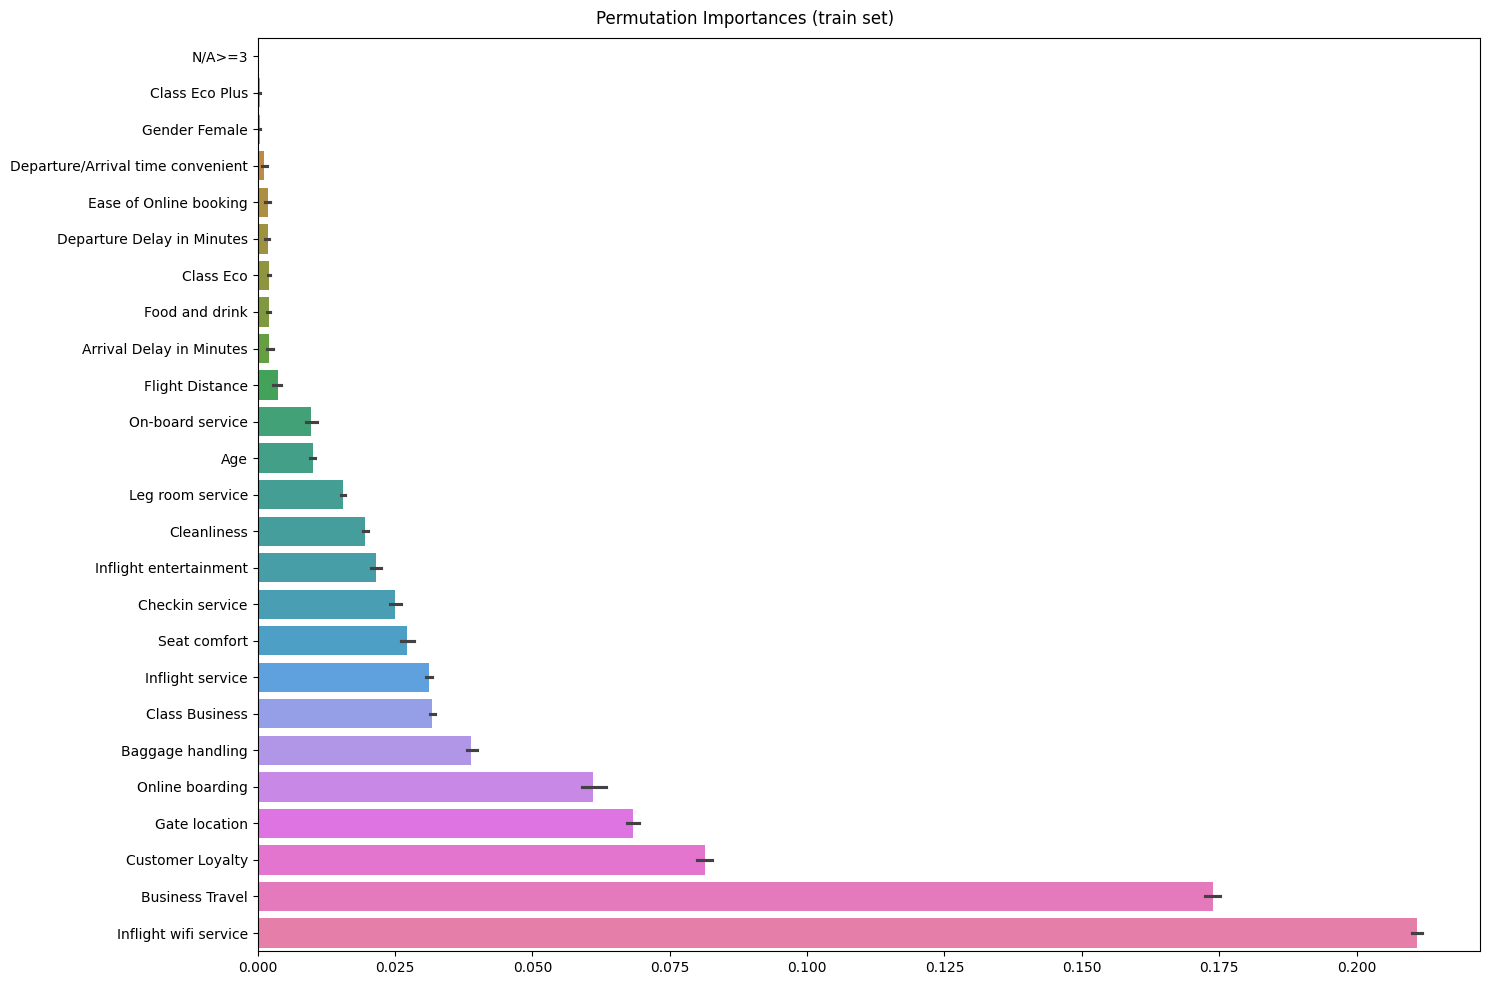

                         Values
Inflight wifi service  0.210999
Business Travel        0.173813
Customer Loyalty       0.081507
Gate location          0.068294
Online boarding        0.060990


In [38]:
# Decision Tree's feature importances visualization

feature_importances_dt = permutation_importance(estimator=dt, X = test, y = y_test, n_repeats=5, random_state=321)

visualize_feature_importance(feature_importances_dt)

In [37]:
# Random Forest - Hyperparmeter search 1

#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV

#rf = RandomForestClassifier()

#params_rf = {
#    'n_estimators': np.array([175,201,225]), # 175
#    'max_depth': np.array([15,16,17,18]), # Also searched: [12,13,14]]
#    'max_features': np.array([0.25,0.3]) #sqrt
#}

#grid = GridSearchCV(rf, params_rf, cv=kfold, verbose=1)
#grid.fit(train, y_train)
#print(f'BEST SCORE - RANDOM FOREST = {grid.best_score_}')
#print('\n')
#print(f'BEST PARAMS - RANDOM FOREST:\n{grid.best_params_}')

In [ ]:
# Random Forest - Hyperparmeter search 2

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

f1_scores = list()
error_rates = list() # 1-accuracy
n_range = n_range = [5*n+1 if n%2 == 0 else 5*n for n in range(51)] #range(101)
for n in n_range:
    rf = RandomForestClassifier(n_estimators=n,max_depth=17,max_features=0.4,random_state=321)
    rf.fit(train,y_train)
    y_pred = rf.predict(test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((error))

n_comp = pd.DataFrame({'F1_Score' : f1_scores,'Error_Rate' : error_rates},index=n_range)

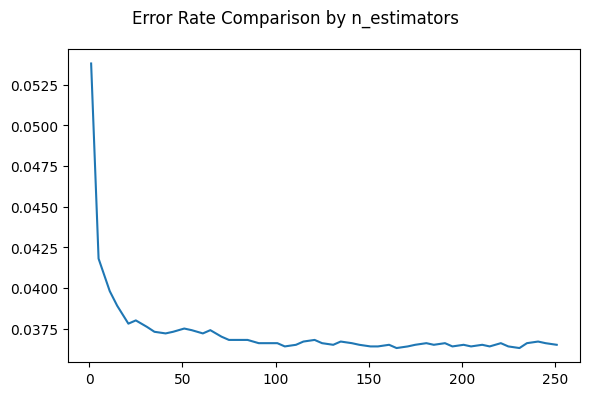

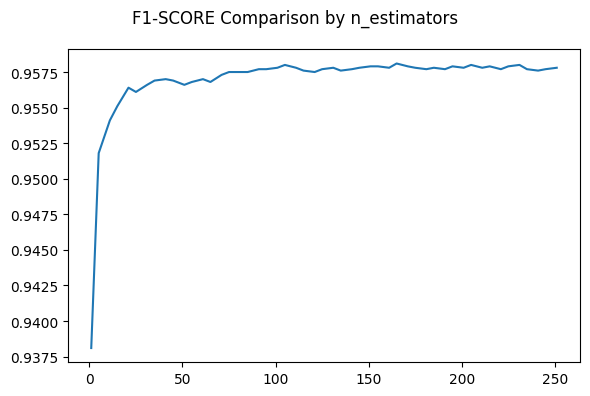

,F1_Score,Error_Rate
165,0.9581,0.0363
231,0.9580,0.0363
105,0.9580,0.0364
205,0.9580,0.0364
171,0.9579,0.0364


In [ ]:
# Plotting results

plt.figure(figsize=(6, 4))
plt.suptitle('Error Rate Comparison by n_estimators')
n_comp['Error_Rate'].plot(kind='line')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.suptitle('F1-SCORE Comparison by n_estimators')
n_comp['F1_Score'].plot(kind='line')
plt.tight_layout()
plt.show()

n_comp.sort_values(by='F1_Score',ascending=False).head()

In [1]:
# Random Forest - Hyperparmeter search 3

#rf_sqrt = RandomForestClassifier(n_estimators=175,max_depth=17,max_features='sqrt',random_state=321)
#rf_sqrt2 = RandomForestClassifier(n_estimators=165,max_depth=17,max_features='sqrt',random_state=321)
#rf_prop = RandomForestClassifier(n_estimators=175,max_depth=17,max_features=0.4,random_state=321)
#rf_prop2 = RandomForestClassifier(n_estimators=165,max_depth=17,max_features=0.4,random_state=321)

#rf_sqrt.fit(train,y_train); rf_sqrt2.fit(train,y_train); rf_prop.fit(train,y_train); rf_prop2.fit(train,y_train)

#y_sqrt = rf_sqrt.predict(test)
#y_sqrt2 = rf_sqrt2.predict(test)
#y_prop = rf_prop.predict(test)
#y_prop2 = rf_prop2.predict(test)
#prob_sqrt = rf_sqrt.predict_proba(test)[:,1]
#prob_sqrt2 = rf_sqrt2.predict_proba(test)[:,1]
#prob_prop = rf_prop.predict_proba(test)[:,1]
#prob_prop2 = rf_prop2.predict_proba(test)[:,1]

#print('max_features = 175; n_features = sqrt - RANDOM FOREST:')
#print(evaluate_metrics(y_test,y_sqrt,prob_sqrt))
#print('\nmax_features = 165; n_features = sqrt - RANDOM FOREST:')
#print(evaluate_metrics(y_test,y_sqrt2,prob_sqrt2))
#print('\nmax_features = 175; n_features = 40% - RANDOM FOREST:')
#print(evaluate_metrics(y_test,y_prop,prob_prop))
#print('\nmax_features = 165; n_features = 40% - RANDOM FOREST:')
#print(evaluate_metrics(y_test,y_prop2,prob_prop2))

#max_features = 175; n_features = sqrt - RANDOM FOREST:
#{'accuracy': 0.9618188129121833, 'recall': 0.9432337434094903, 'precision': 0.9689474634410543, 'f1score': 0.9559177130643869, 'roc_auc': 0.9938806301618638}
#
#max_features = 165; n_features = sqrt - RANDOM FOREST:
#{'accuracy': 0.9619730803347603, 'recall': 0.9434094903339192, 'precision': 0.969128001444304, 'f1score': 0.9560958233146317, 'roc_auc': 0.993869353802392}
#
#max_features = 175; n_features = 40% - RANDOM FOREST:
#{'accuracy': 0.9635157545605307, 'recall': 0.9440246045694201, 'precision': 0.9720412595005429, 'f1score': 0.9578281027104137, 'roc_auc': 0.9945283715499444}
#
#max_features = 165; n_features = 40% - RANDOM FOREST:
#{'accuracy': 0.9634386208492421, 'recall': 0.9436731107205624, 'precision': 0.972207133804092, 'f1score': 0.9577276375635423, 'roc_auc': 0.9945029952112616}

In [ ]:
# Random Forest - Hyperparmeter search 4

#rf_gini = RandomForestClassifier(n_estimators=165,max_depth=17,max_features=0.4,random_state=321)
#rf_entr = RandomForestClassifier(n_estimators=165,max_depth=17,max_features=0.4,criterion='entropy',random_state=321)

#rf_gini.fit(train,y_train)
#rf_entr.fit(train,y_train)

#y_gini = rf_gini.predict(test)
#y_entr = rf_entr.predict(test)
#prob_gini = rf_gini.predict_proba(test)[:,1]
#prob_entr = rf_entr.predict_proba(test)[:,1]

#print('Gini - RANDOM FOREST:')
#print(evaluate_metrics(y_test,y_gini,prob_gini))
#print('\nEntropy - RANDOM FOREST:')
#print(evaluate_metrics(y_test,y_entr,prob_entr))

#Gini - RANDOM FOREST:
#{'accuracy': 0.9637471556943963, 'recall': 0.9440246045694201, 'precision': 0.9725692558392178, 'f1score': 0.9580843663604744, 'roc_auc': 0.9945306938639331}
#Entropy - RANDOM FOREST:
#{'accuracy': 0.9643642253847043, 'recall': 0.9436731107205624, 'precision': 0.9743240791144983, 'f1score': 0.9587536827069012, 'roc_auc': 0.9948539605751415}

{'accuracy': 0.9643642253847043, 'recall': 0.9436731107205624, 'precision': 0.9743240791144983, 'f1score': 0.9587536827069012, 'roc_auc': 0.9948539605751415}


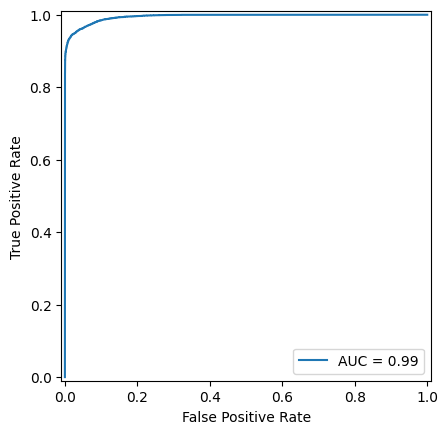

In [31]:
# Random Forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=165,max_depth=17,max_features=0.4,criterion='entropy',random_state=321)
rf.fit(train,y_train)
y_rf = rf.predict(test)
prob_rf = rf.predict_proba(test)[:,1]
rf_score = evaluate_metrics(y_test,y_rf,prob_rf)
print(rf_score) # Printing scores
roc_curve_graph(y_test,prob_rf) # Plotting roc-curve

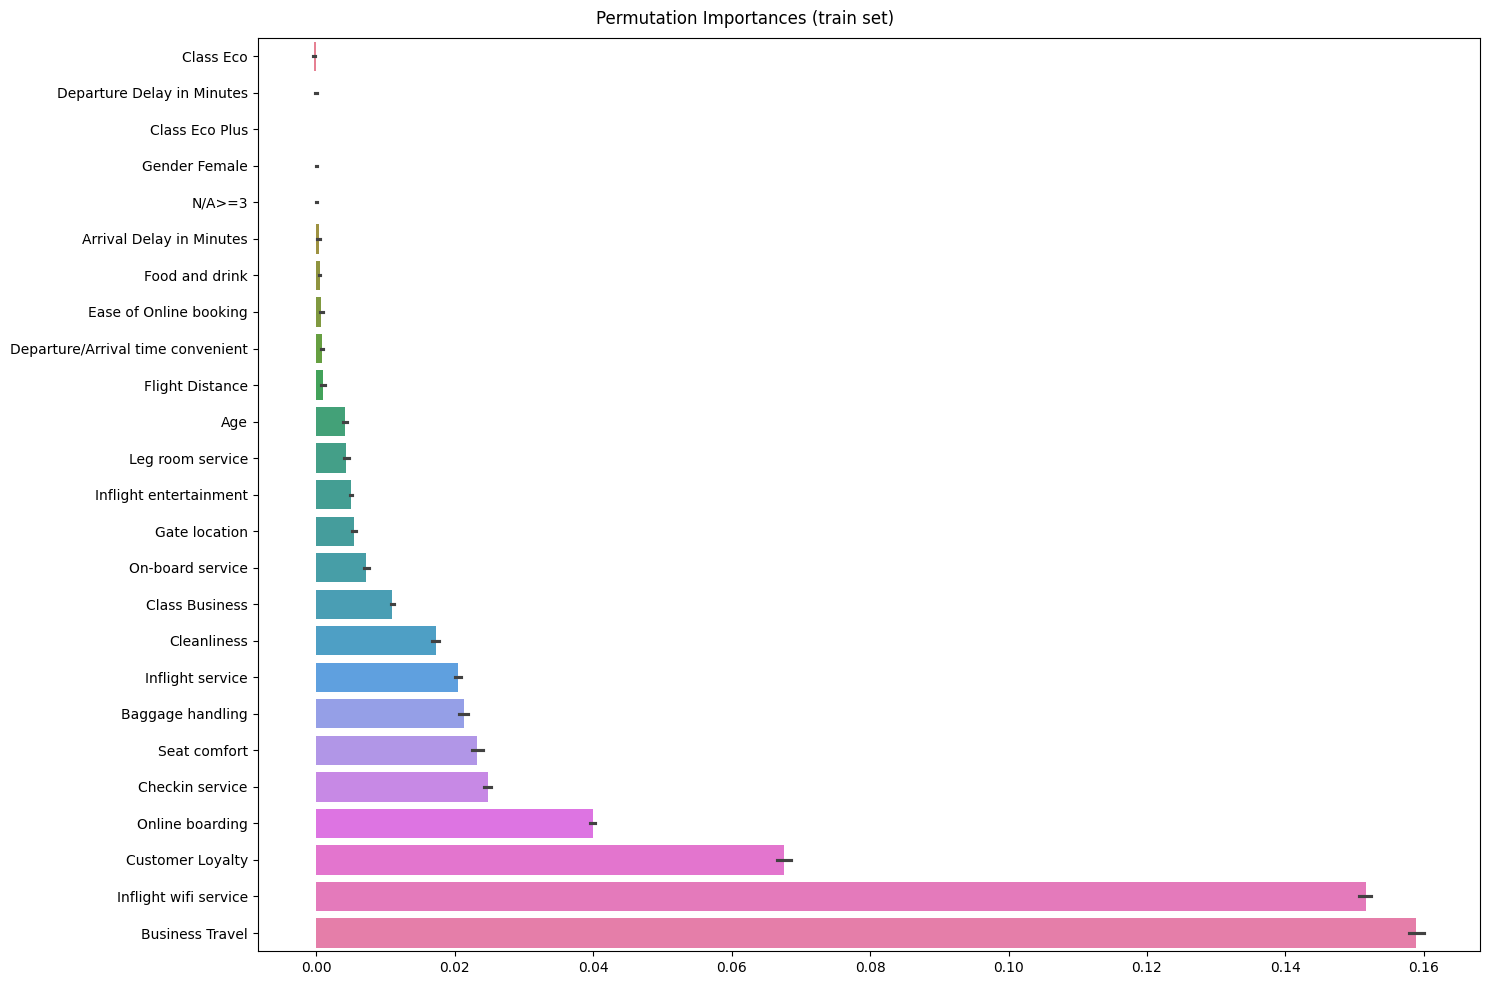

                         Values
Business Travel        0.158865
Inflight wifi service  0.151583
Customer Loyalty       0.067569
Online boarding        0.039909
Checkin service        0.024721


In [30]:
# Random Forest's feature importances visualization

feature_importances_rf = permutation_importance(estimator=rf, X = test, y = y_test, n_repeats=5, random_state=321)

visualize_feature_importance(feature_importances_rf)

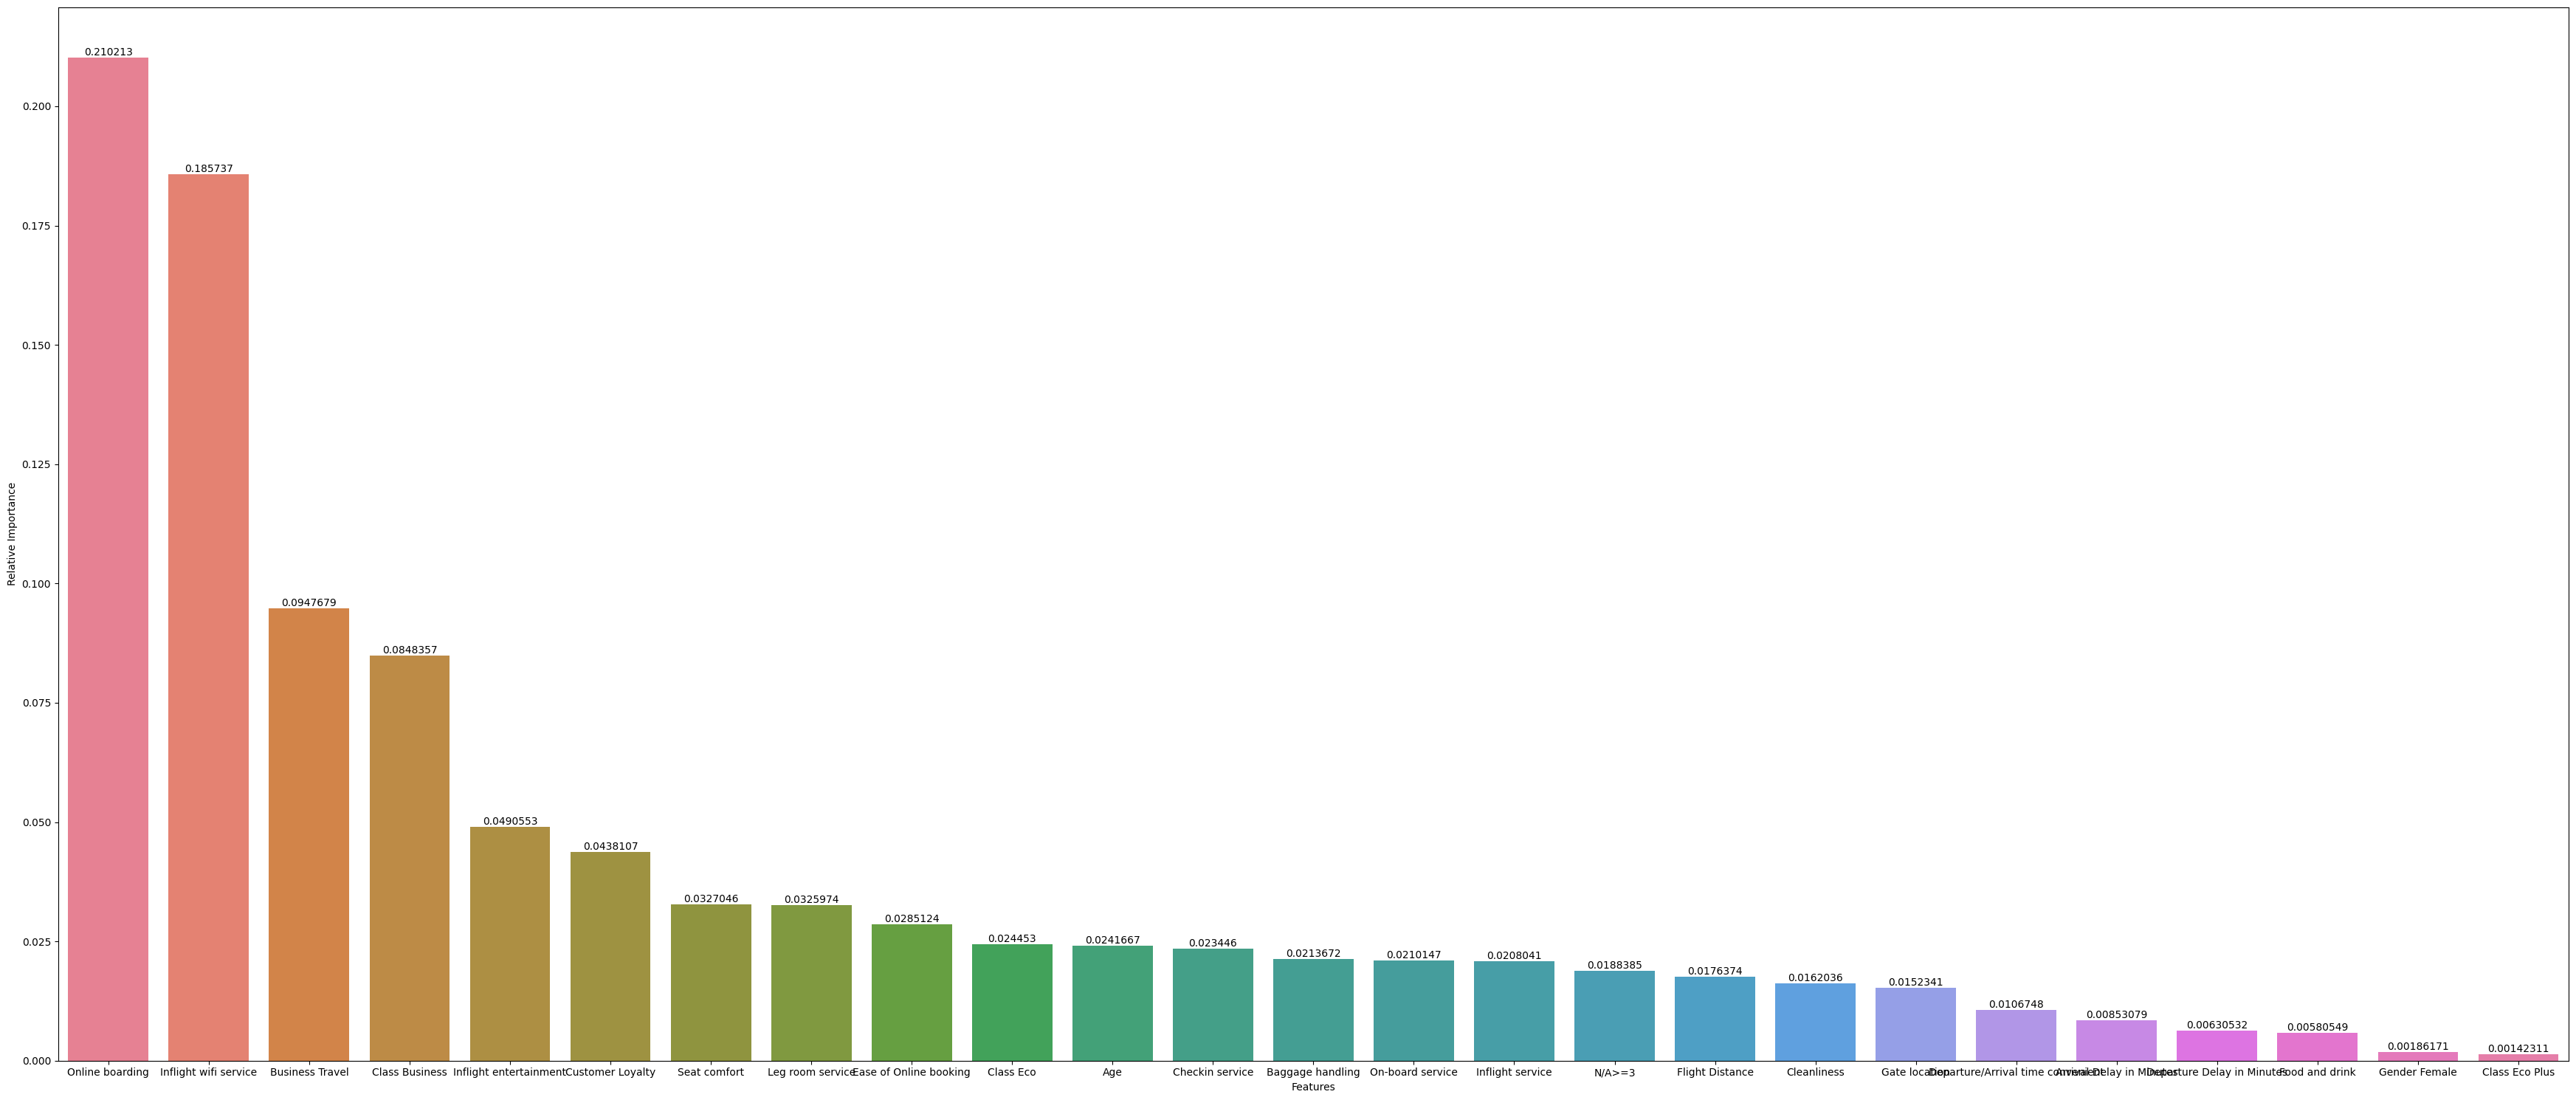

,Features,Relative Importance
7,Online boarding,0.210213
2,Inflight wifi service,0.185737
21,Business Travel,0.094768
22,Class Business,0.084836
9,Inflight entertainment,0.049055


In [29]:
# Impurity-based feature importances

feature_imp = pd.DataFrame([train.columns.values,rf.feature_importances_])\
.rename({0:'Features',1:'Relative Importance'},axis=0).T\
.sort_values(by='Relative Importance',ascending=False)

plt.figure(figsize=(35,15))
ax = sns.barplot(feature_imp,x='Features',y='Relative Importance',hue='Features')
for i in range(len(ax.containers)): ax.bar_label(ax.containers[i], fontsize=10)
plt.ylabel('Relative Importance')
plt.xlabel('Features')

# Adjust the layout to prevent label overlapping
plt.tight_layout()
plt.show()

feature_imp.head()

In [44]:
# Organizing features importances dataframe

scores = pd.DataFrame(columns=[k for k in dt_score.keys()])
feature_importances = pd.DataFrame(columns=train.columns)
models = ['Logistic Regression','KNN','Decision Tree','Random Forest']
feat_imp = [feature_importances_logreg,feature_importances_knn,feature_importances_dt,feature_importances_rf]

for i,score in enumerate([logreg_score,knn_score,dt_score,rf_score]):
    model_score = pd.DataFrame(data=np.array([[v] for k,v in score.items()]).T,columns=[k for k in dt_score.keys()],index=[models[i]])
    scores = pd.concat([scores,model_score])
    model_imp = pd.DataFrame(feat_imp[i].importances_mean,index=train.columns,columns=[models[i]]).T
    feature_importances = pd.concat([feature_importances,model_imp])

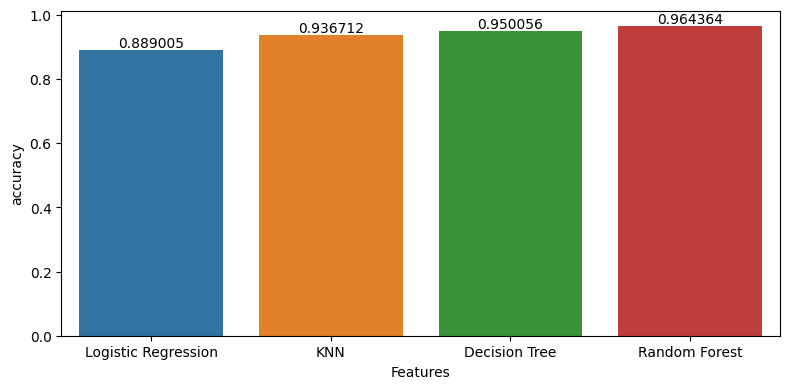

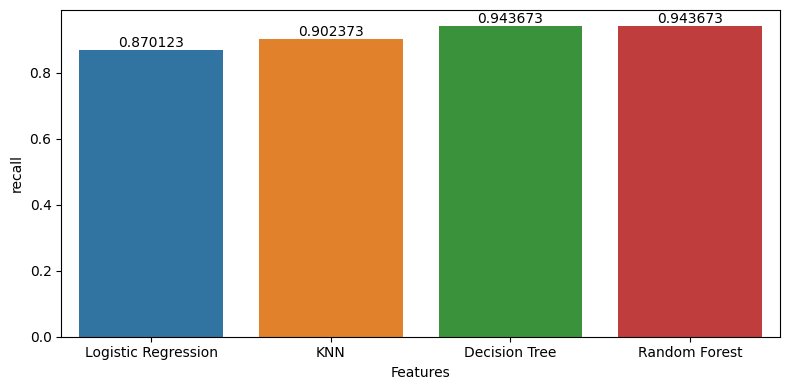

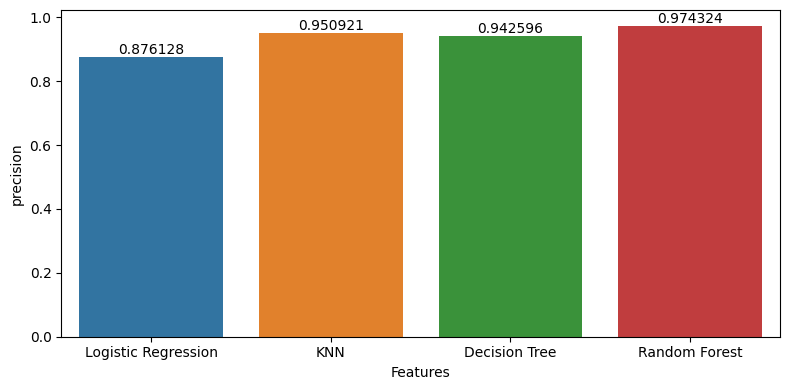

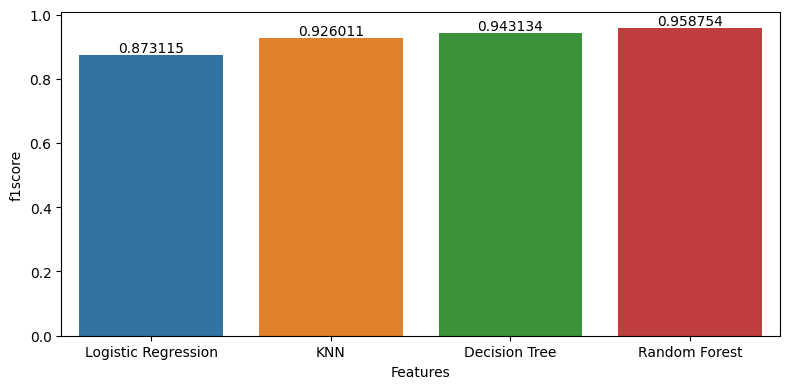

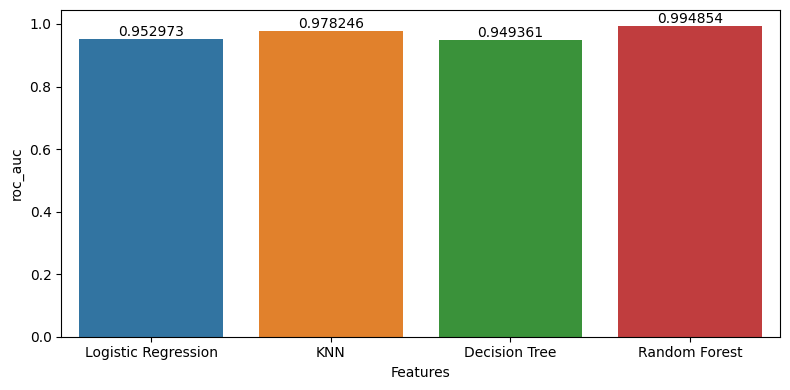

In [45]:
# Comparing the models scores

for k in dt_score.keys():
    plt.figure(figsize=(8,4))
    ax = sns.barplot(scores,hue=scores.index,x=scores.index,y=k)
    for i in range(len(ax.containers)): ax.bar_label(ax.containers[i], fontsize=10)
    plt.ylabel(k)
    plt.xlabel('Features')
    plt.tight_layout()
    plt.show()

In [47]:
# Feature importances comparison ordering by Random Forest's results

feature_importances.T.sort_values(ascending=False,by='Random Forest').head()

,Logistic Regression,KNN,Decision Tree,Random Forest
Business Travel,0.100590,0.127726,0.173813,0.158865
Inflight wifi service,0.022677,0.056585,0.210999,0.151583
Customer Loyalty,0.039462,0.078800,0.081507,0.067569
Online boarding,0.052621,0.015072,0.060990,0.039909
Checkin service,0.006194,0.006888,0.025053,0.024721


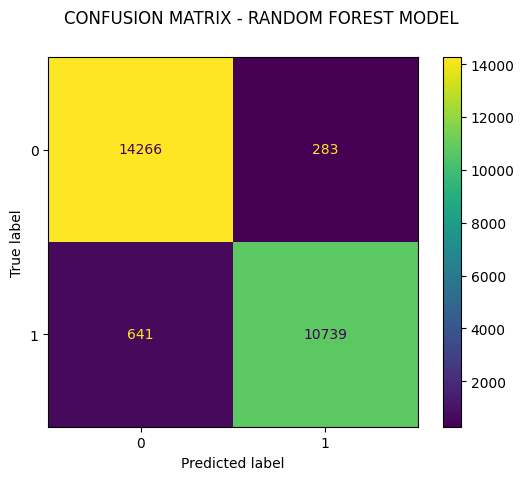

In [48]:
# Displaying random forest model's confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = rf.predict(test)
cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.suptitle('CONFUSION MATRIX - RANDOM FOREST MODEL')
plt.show()